<a href="https://colab.research.google.com/github/wisleygoncalves/logica_fuzzy/blob/main/L%C3%B3gica_Fuzzy_Algodao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy
!pip install scipy
!pip install seaborn
!pip install scikit-posthocs
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=498fa0467d9c89d32258a7eb818fd47351bfceb660226def11aaba1de00bcd55
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import skfuzzy as fuzzy
import numpy as np
from google.colab import drive
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm, kurtosis, skew
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression.quantile_regression import QuantReg
from scipy.stats import kruskal
from scipy import stats
import scikit_posthocs as sp
from scikit_posthocs import posthoc_dunn
from scikit_posthocs import posthoc_nemenyi
from scikit_posthocs import posthoc_tamhane
from scipy.stats import ttest_1samp
import pingouin as pg
from scipy.stats import friedmanchisquare
from scipy.stats import chi2
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import seaborn as sns
from math import sqrt
from itertools import chain
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Safras

base_path = '/content/drive/MyDrive/LOGICA_FUZZZY/Planilhas/Pixels_Algodao.xlsx'

list_data_safra  = []

contagem_pixel = None

for i in range(0, 6, 1):
  year = 'Safra' + str(18 + i)

  data_safra = pd.read_excel(base_path, sheet_name = year)
  list_data_safra.append(data_safra)
  print(data_safra)

contagem_pixel = pd.read_excel(base_path, sheet_name = 'Contagem_Pixel')
print(contagem_pixel)

print(len(list_data_safra))

        Classe   Valores
0            1  0.007126
1            1  0.001167
2            1  0.003248
3            1  0.024753
4            1  0.007407
...        ...       ...
331274       5  0.384680
331275       5  0.372714
331276       5  0.379787
331277       5  0.407064
331278       5  0.382812

[331279 rows x 2 columns]
        Classe   Valores
0            1  0.108159
1            1  0.104735
2            1  0.102547
3            1  0.114718
4            1  0.117589
...        ...       ...
331324       5  0.358431
331325       5  0.366563
331326       5  0.399647
331327       5  0.380537
331328       5  0.390078

[331329 rows x 2 columns]
        Classe   Valores
0            1  0.013032
1            1  0.022300
2            1  0.023195
3            1  0.169131
4            1  0.053570
...        ...       ...
331334       5  0.369897
331335       5  0.375314
331336       5  0.407913
331337       5  0.385163
331338       5  0.382386

[331339 rows x 2 columns]
        Classe   Va

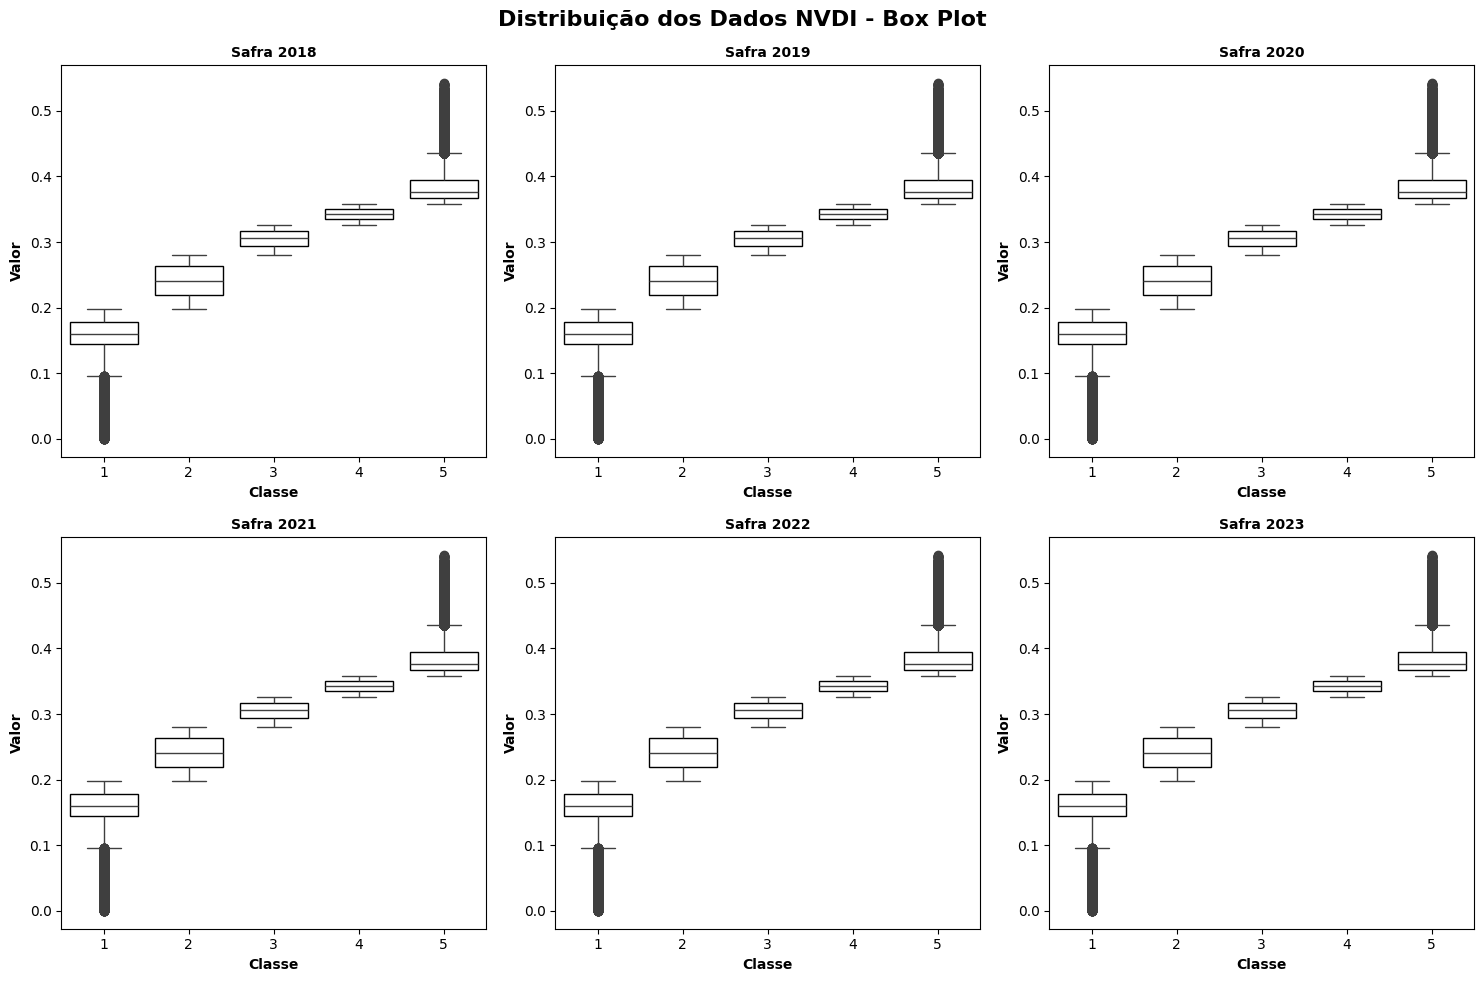

In [ ]:
# Distribuição dos dados (Box-plot com outliers)

path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/1.NVDI/box_plot_nvdi.png'
num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Dados NVDI - Box Plot", fontsize=16, fontweight='bold')

def box_grad(data, classes, safra, row, col):
  ax = sns.boxplot(x='Classe', y='Valores', data=data_safra, order=classes,
                   boxprops=dict(facecolor='white', edgecolor='black'), ax=axs[row, col])

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel('Classe', fontsize=10, fontweight='bold')
  ax.set_ylabel('Valor', fontsize=10, fontweight='bold')

  axs[row, col].set_facecolor('white')

for i in range(0, 6, 1):
  row = i // num_colunas
  col = i % num_colunas

  safra_title = 'Safra ' + str(2018 + i)
  classes = sorted(data_safra['Classe'].unique())

  sns.set(style="whitegrid")
  box_grad(list_data_safra[i], classes, safra_title, row, col)

plt.tight_layout()
plt.savefig(path, dpi=300)
plt.show()

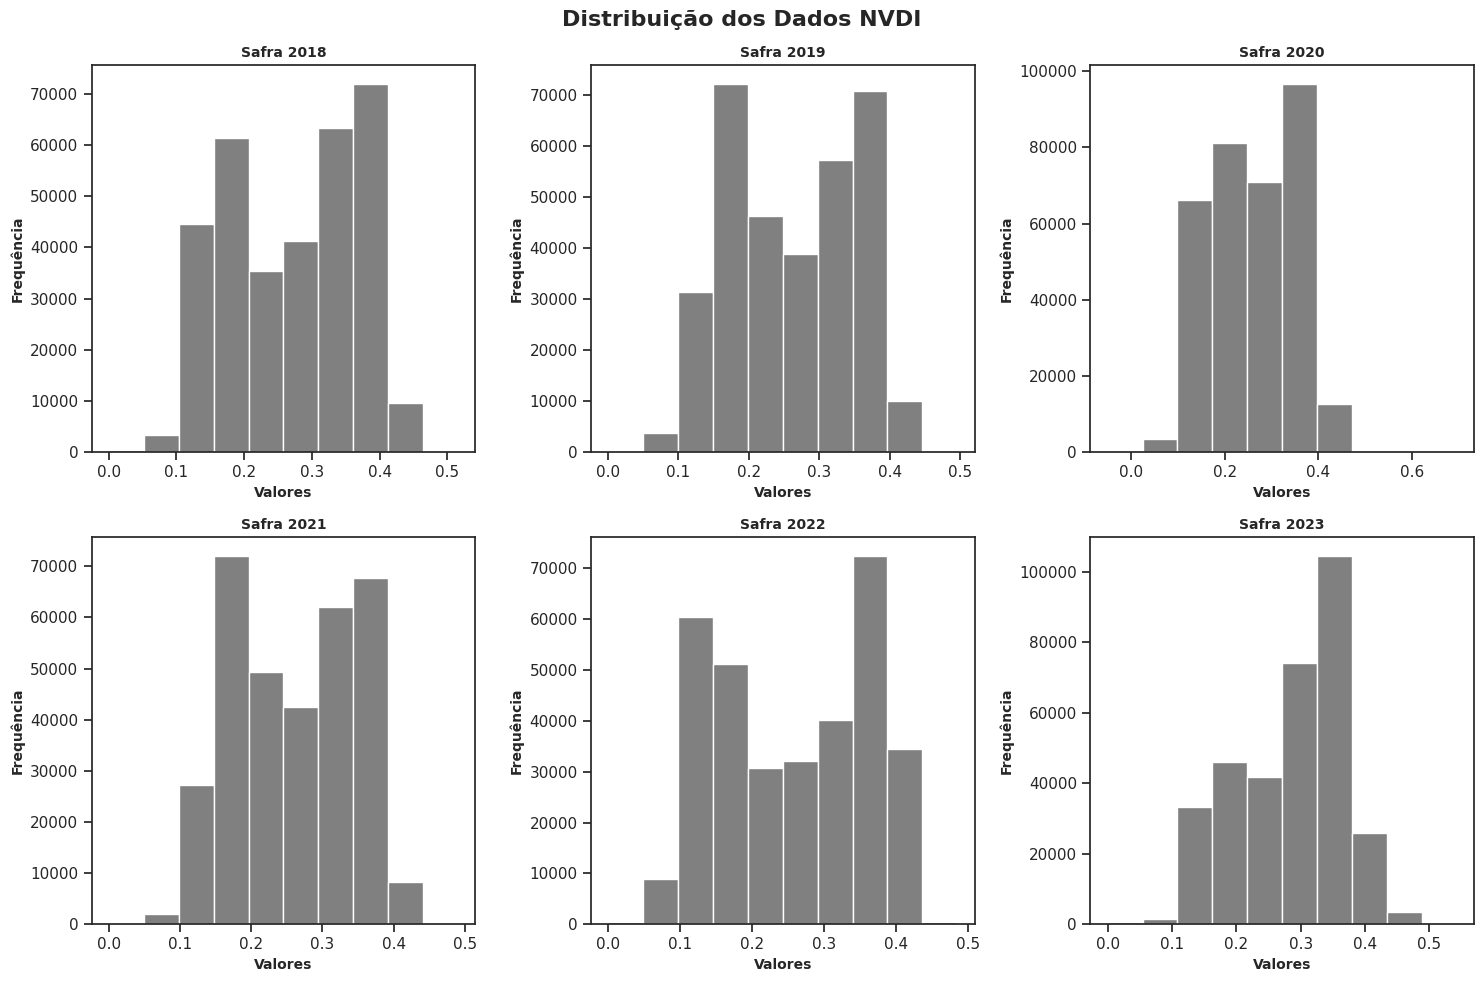

In [ ]:
# Histograma com a Curva Normal

path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/1.NVDI/histograma_nvdi.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Dados NVDI", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data['Valores'], color=['gray'], label='Valores')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')

for i in range(0, 6, 1):
    sns.set(style="whitegrid")
    safra = 'Safra ' + str(2018 + i)
    hist_grad(list_data_safra[i], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.savefig(path)
plt.show()

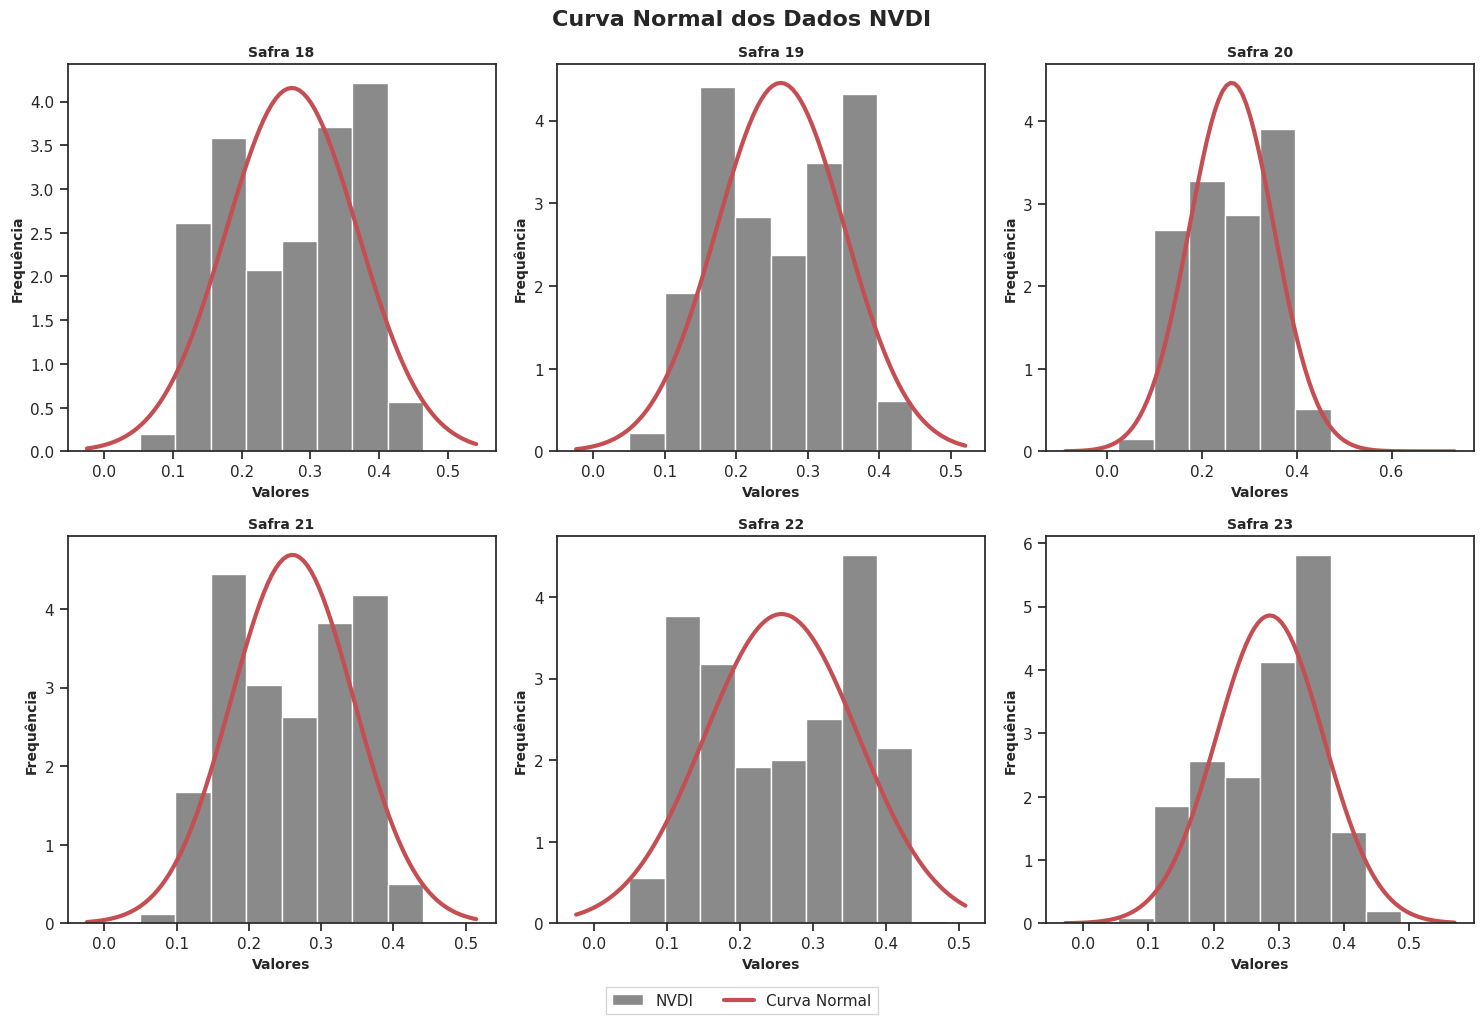

In [ ]:
# Histograma com a Curva Normal

path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/1.NVDI/curva_normal_nvdi.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Curva Normal dos Dados NVDI", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data['Valores'], color=['#8a8a8a'], label='NVDI', density=True)

  mu, std = np.mean(data['Valores']), np.std(data['Valores'])
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(0, 6, 1):
    safra = 'Safra ' + str(i + 18)
    hist_grad(list_data_safra[i], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Curtose e Assimetria da Curva Normal
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/1.NVDI/estatic_curva-normal.xlsx'

list_mean = []
list_median = []
list_mode = []
list_std = []
list_curtose = []
list_assimetria = []
list_cv = []

list_safra = []

for i, data in enumerate(list_data_safra):
  safra = 'Safra' + str(18 + i)
  list_safra.append(safra)

  mean = np.mean(list_data_safra[i]['Valores'])
  median = np.median(list_data_safra[i]['Valores'])
  mode = stats.mode(list_data_safra[i]['Valores'])
  std = np.std(list_data_safra[i]['Valores'])
  curtose = kurtosis(list_data_safra[i]['Valores'])
  simetria = skew(list_data_safra[i]['Valores'])
  cv_percent = (std / mean) * 100

  list_mean.append(mean)
  list_median.append(median)
  list_mode.append(mode)
  list_std.append(std)
  list_curtose.append(curtose)
  list_assimetria.append(simetria)
  list_cv.append(cv_percent)

df_norm = pd.DataFrame({'Safra': list_safra,
                        'Média': list_mean,
                        'Mediana': list_median,
                        'Moda': list_mode,
                        'Desvio Padrão': list_std,
                        'Curtose': list_curtose,
                        'Assimetria': list_assimetria,
                        'CV%': list_cv})

print(df_norm)

df_norm.to_excel(path, index=False)

     Safra     Média   Mediana                      Moda  Desvio Padrão  \
0  Safra18  0.272907  0.288516  (0.3333333432674408, 30)       0.095988   
1  Safra19  0.262186  0.266617  (0.3333333432674408, 37)       0.089525   
2  Safra20  0.263115  0.271439  (0.3333333432674408, 34)       0.089275   
3  Safra21  0.260279  0.266924  (0.3333333432674408, 32)       0.085072   
4  Safra22  0.256976  0.265303  (0.3333333432674408, 28)       0.105209   
5  Safra23  0.286419  0.306043  (0.3333333432674408, 44)       0.082069   

    Curtose  Assimetria        CV%  
0 -1.304346   -0.156121  35.172639  
1 -1.308277   -0.049108  34.145803  
2 -1.255630   -0.047870  33.930120  
3 -1.282054   -0.055900  32.685075  
4 -1.443242   -0.091538  40.941033  
5 -0.724377   -0.428818  28.653587  


In [ ]:
# Selecionar os valores de pixels da área de soja

lista_data_soja = []

for i, data in enumerate(list_data_safra):
  data_soja = data.loc[data['Classe'] == 5]
  lista_data_soja.append(data_soja)
  print(data_soja)

        Classe   Valores
265118       5  0.405813
265119       5  0.401833
265120       5  0.381487
265121       5  0.388435
265122       5  0.410510
...        ...       ...
331274       5  0.384680
331275       5  0.372714
331276       5  0.379787
331277       5  0.407064
331278       5  0.382812

[66161 rows x 2 columns]
        Classe   Valores
265083       5  0.385766
265084       5  0.380858
265085       5  0.368363
265086       5  0.377693
265087       5  0.386789
...        ...       ...
331324       5  0.358431
331325       5  0.366563
331326       5  0.399647
331327       5  0.380537
331328       5  0.390078

[66246 rows x 2 columns]
        Classe   Valores
265102       5  0.392691
265103       5  0.367732
265104       5  0.383484
265105       5  0.389598
265106       5  0.431488
...        ...       ...
331334       5  0.369897
331335       5  0.375314
331336       5  0.407913
331337       5  0.385163
331338       5  0.382386

[66237 rows x 2 columns]
        Classe   Valor

In [ ]:
# Pré-Processamento dos datas [Redimensionamento dos dados]

lista_data_soja_red = []

for data in lista_data_soja:
  scaler = MinMaxScaler()
  data_red = scaler.fit_transform(data[['Valores']])
  df_red = pd.DataFrame({'Classe': data['Classe'], 'Valores':  data_red.reshape(-1)})
  lista_data_soja_red.append(df_red)
  print(df_red)

        Classe   Valores
265118       5  0.235411
265119       5  0.207699
265120       5  0.066041
265121       5  0.114415
265122       5  0.268112
...        ...       ...
331274       5  0.088271
331275       5  0.004961
331276       5  0.054205
331277       5  0.244124
331278       5  0.075269

[66161 rows x 2 columns]
        Classe   Valores
265083       5  0.202469
265084       5  0.166934
265085       5  0.076475
265086       5  0.144024
265087       5  0.209874
...        ...       ...
331324       5  0.004565
331325       5  0.063438
331326       5  0.302963
331327       5  0.164612
331328       5  0.233690

[66246 rows x 2 columns]
        Classe   Valores
265102       5  0.107598
265103       5  0.034003
265104       5  0.080451
265105       5  0.098479
265106       5  0.222000
...        ...       ...
331334       5  0.040385
331335       5  0.056361
331336       5  0.152483
331337       5  0.085401
331338       5  0.077214

[66237 rows x 2 columns]
        Classe   Valor

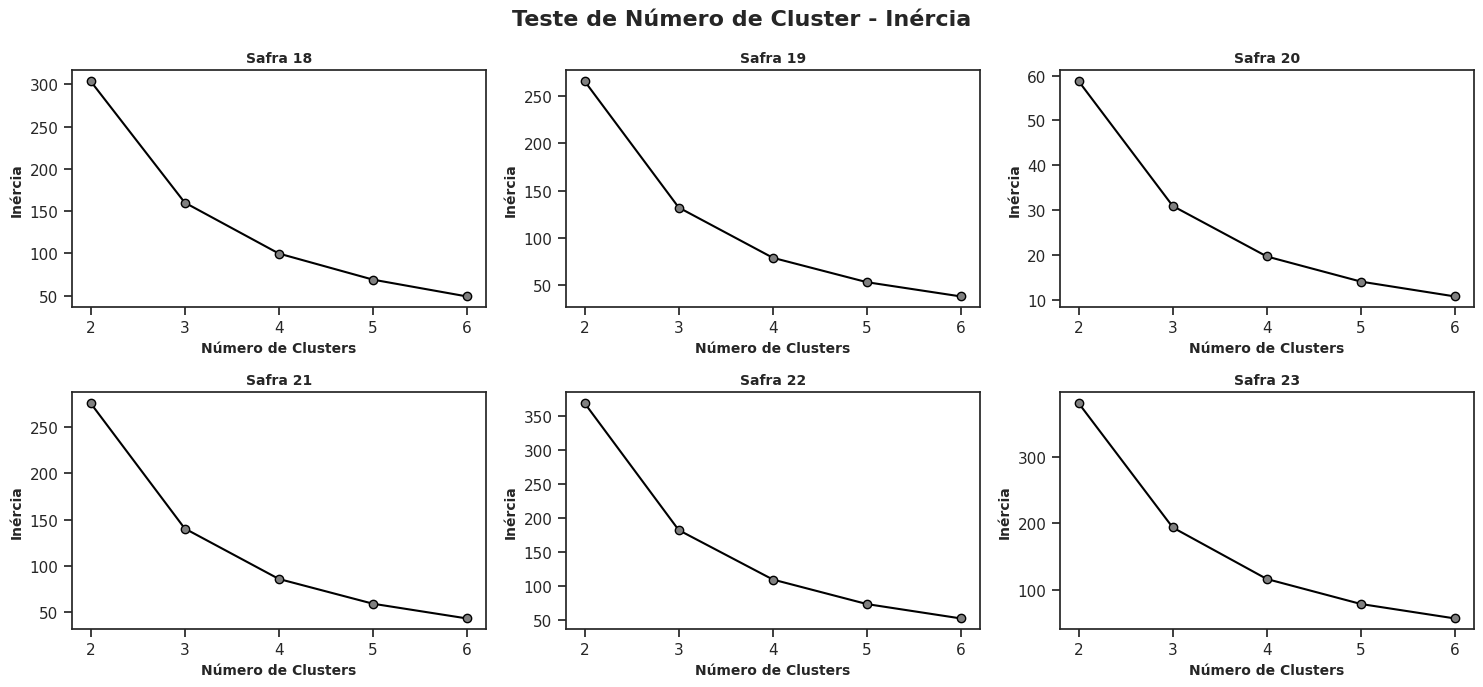

In [ ]:
# Definindo o número de cluster - [Gráfico] - Teste de Elbow
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/2.Teste_Fuzzy/teste_cluster_inercia.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 7))
fig.suptitle("Teste de Número de Cluster - Inércia", fontsize=16, fontweight='bold')

def score_grad(data, safra, ax):
    n_clusters = range(2, 7)

    kmeans = [KMeans(n_clusters=i, n_init=10).fit(data) for i in n_clusters]
    inertias = [kmeans[i].inertia_ for i in range(len(kmeans))]

    ax.plot(n_clusters, inertias, color='black', marker='o', markerfacecolor='gray')
    ax.set_title(safra, fontsize=10, fontweight='bold')
    ax.set_xlabel("Número de Clusters", fontsize=10, fontweight='bold')
    ax.set_ylabel("Inércia", fontsize=10, fontweight='bold')
    ax.set_xticks(n_clusters)

    return ax, inertias

for i in range(0, 6, 1):
    safra = 'Safra ' + str(i + 18)
    valores = lista_data_soja_red[i]['Valores'].values.reshape(-1, 1)
    ax, score = score_grad(valores, safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.savefig(path)
plt.show()

In [ ]:
# Teste melhor distância [m] e cluster[c]
indice = range(2, 7)

results_by_teste_fuzzy = {
    'safra18': [],
    'safra19': [],
    'safra20': [],
    'safra21': [],
    'safra22': [],
    'safra23': []
}

for i, data in enumerate(lista_data_soja_red):
  tamanho_amostra = int(0.05 * len(data))
  amostra_aleatoria = data.sample(n=tamanho_amostra, replace=False)

  for _i in indice:
    cntr, u, u0, d, jm, p, fpc = fuzzy.cluster.cmeans(amostra_aleatoria.values.reshape(1, -1), c=6, m=_i, error=0.005, maxiter=1000, init=None)
    labels = np.max(u, axis=0)

    score = silhouette_score(amostra_aleatoria.values.reshape(-1, 1), labels)

    mean = np.mean(labels)
    mse = mean_squared_error(labels, [mean] * len(labels))
    rmse = np.sqrt(mse)
    std = labels.std()

    results_by_teste_fuzzy[f'safra{i + 18}'].append({_i: score,
                                                    'mean': mean,
                                                    'mse': mse,
                                                    'rmse': rmse,
                                                    'std': std})


for i, data in enumerate(results_by_teste_fuzzy):
  print(results_by_teste_fuzzy[f'safra{i + 18}'])

[{2: 0.5030229746070133, 'mean': 0.912663791343812, 'mse': 0.02117509484747933, 'rmse': 0.14551664800798336, 'std': 0.14551664800798336}, {3: 0.5030229746070133, 'mean': 0.8106452355518463, 'mse': 0.05131077082921789, 'rmse': 0.22651880899655527, 'std': 0.22651880899655527}, {4: 0.5030229746070133, 'mean': 0.7447720188551503, 'mse': 0.07620500840502888, 'rmse': 0.2760525464563384, 'std': 0.2760525464563384}, {5: 0.5030229746070133, 'mean': 0.7039700632399627, 'mse': 0.09424582021990499, 'rmse': 0.3069948211613756, 'std': 0.3069948211613756}, {6: 0.5030229746070133, 'mean': 0.6784923011644106, 'mse': 0.10688323285405192, 'rmse': 0.32693001216476275, 'std': 0.32693001216476275}]
[{2: 0.5030193236714976, 'mean': 0.9142241923484261, 'mse': 0.020505119790755137, 'rmse': 0.14319608860145286, 'std': 0.14319608860145286}, {3: 0.5030193236714976, 'mean': 0.8120110444257784, 'mse': 0.05049655239978519, 'rmse': 0.2247143796017184, 'std': 0.2247143796017184}, {4: 0.5030193236714976, 'mean': 0.7470

In [ ]:
# Teste melhor distância [m] e cluster[c] - Dataframe
dfs_teste_fuzzy = []

for safra, results_list in results_by_teste_fuzzy.items():
  sorted_results = sorted(results_list, key=lambda x: list(x.values())[3])
  i_values = [list(item.keys())[0] for item in sorted_results]
  scores = [list(item.values())[0] for item in sorted_results]
  mean = [list(item.values())[1] for item in sorted_results]
  mse = [list(item.values())[2] for item in sorted_results]
  rmse = [list(item.values())[3] for item in sorted_results]
  std = [list(item.values())[4] for item in sorted_results]

  df = pd.DataFrame({'m': i_values,
                     'SCORE': scores,
                     'MEAN': mean,
                     'MSE': mse,
                     'RMSE ': rmse,
                     'STD': std})

  dfs_teste_fuzzy.append(df)

for df in dfs_teste_fuzzy:
    print(df)

   m     SCORE      MEAN       MSE     RMSE        STD
0  2  0.503023  0.912664  0.021175  0.145517  0.145517
1  3  0.503023  0.810645  0.051311  0.226519  0.226519
2  4  0.503023  0.744772  0.076205  0.276053  0.276053
3  5  0.503023  0.703970  0.094246  0.306995  0.306995
4  6  0.503023  0.678492  0.106883  0.326930  0.326930
   m     SCORE      MEAN       MSE     RMSE        STD
0  2  0.503019  0.914224  0.020505  0.143196  0.143196
1  3  0.503019  0.812011  0.050497  0.224714  0.224714
2  4  0.503019  0.747049  0.075297  0.274402  0.274402
3  5  0.503019  0.706519  0.093158  0.305218  0.305218
4  6  0.503019  0.680106  0.106053  0.325657  0.325657
   m     SCORE      MEAN       MSE     RMSE        STD
0  2  0.501208  0.912318  0.021319  0.146009  0.146009
1  3  0.501208  0.809157  0.051623  0.227206  0.227206
2  4  0.501208  0.745135  0.076040  0.275754  0.275754
3  5  0.501208  0.706393  0.093452  0.305700  0.305700
4  6  0.501208  0.681626  0.106049  0.325652  0.325652
   m     S

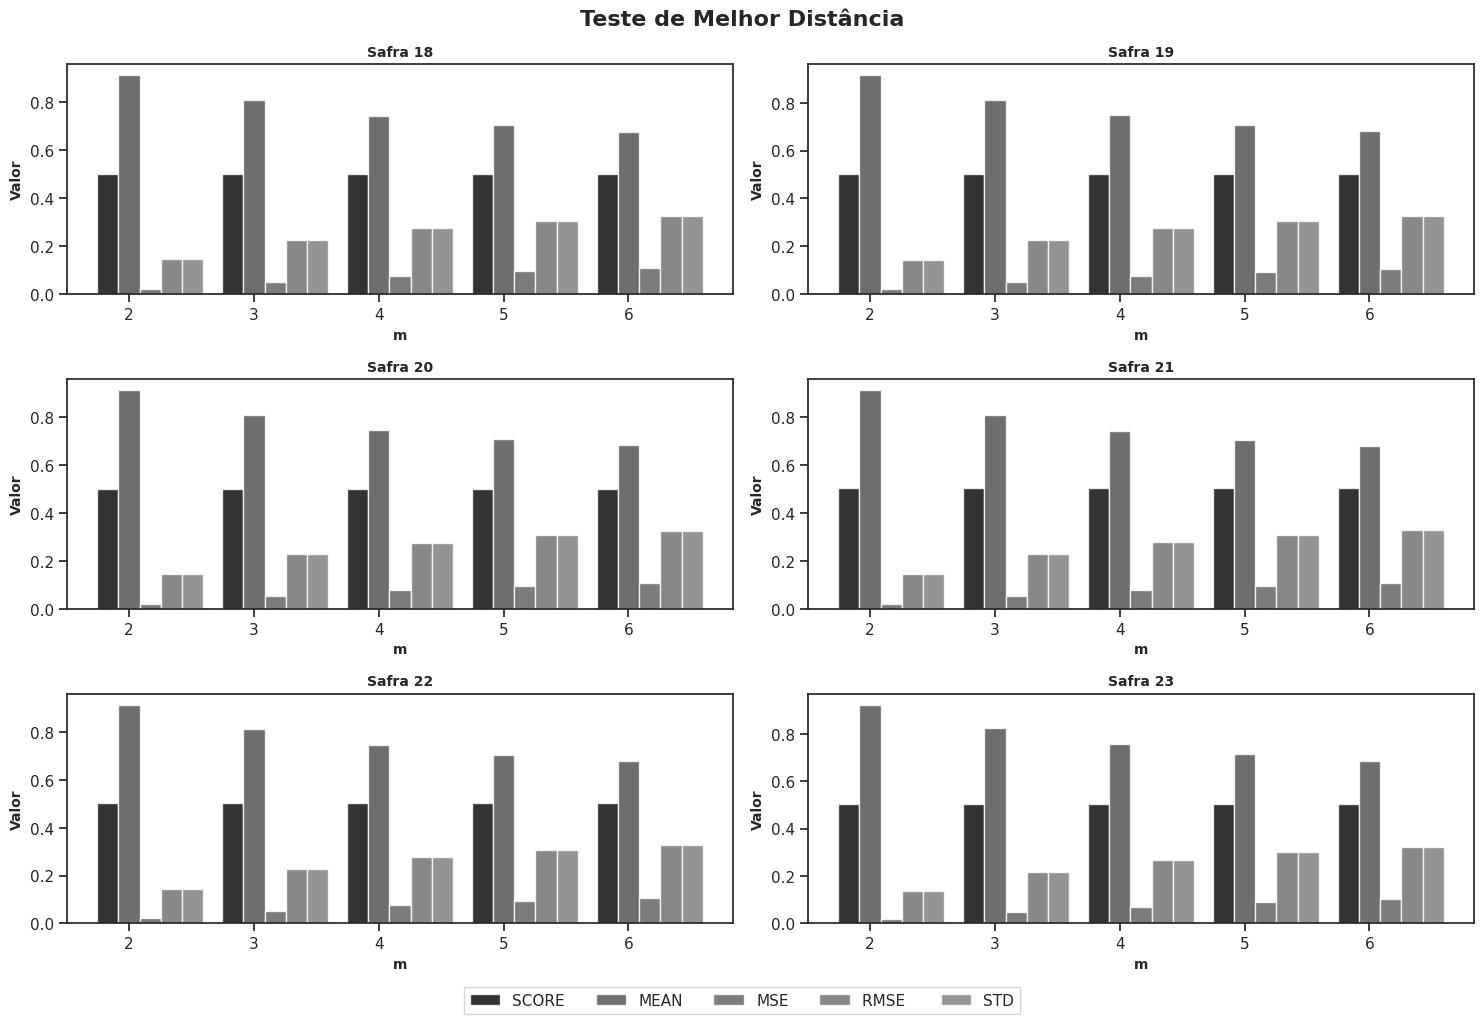

In [ ]:
# Teste melhor distância [m] e cluster[c] - Gráfico
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/2.Teste_Fuzzy/teste_distancia_fuzzy.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 3
num_colunas = 2
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Teste de Melhor Distância", fontsize=16, fontweight='bold')

bar_width = 0.17
opacity = 0.8
colors = ['black', '#4a4a4a', '#5a5a5a', '#6a6a6a', '#7a7a7a']

for i, data in enumerate(dfs_teste_fuzzy):
    m = data.shape[0]
    index = np.arange(m)

    for j, metric in enumerate(data.columns[1:]):
        ax = axs[i // num_colunas, i % num_colunas]
        bars = ax.bar(index + j * bar_width - bar_width,
               data[metric],
               bar_width,
               alpha=opacity,
               color=colors[j],
               label=metric)

    ax.set_xlabel('m', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valor', fontsize=10, fontweight='bold')
    ax.set_title(f'Safra {i+18}', fontsize=10, fontweight='bold')
    ax.set_xticks(index)
    ax.set_xticklabels(data['m'])


handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Lógica Fuzzy
list_fuzzy = []

for i, data in enumerate(lista_data_soja_red):
  cluster = 6
  m = dfs_teste_fuzzy[i]['m'][0]
  data = data['Valores']

  agrupamento = fuzzy.cmeans(data=data.values.reshape(1, -1),
                             c=cluster, m=m, error=0.005, maxiter = 1000)

  grau_pertinencia = agrupamento[1]
  print(grau_pertinencia)

  list_fuzzy.append(grau_pertinencia)

[[3.79580193e-02 4.80092043e-01 4.99983987e-02 ... 2.90309238e-02
  3.47316836e-03 4.85620719e-02]
 [3.82304859e-03 2.11619596e-02 4.61153430e-01 ... 7.69464797e-01
  4.14211515e-04 2.31725640e-01]
 [1.45084452e-02 3.74768176e-02 7.29730394e-03 ... 4.82369815e-03
  2.03373521e-03 6.31104778e-03]
 [9.32227043e-01 3.95000988e-01 1.64634086e-02 ... 1.04439828e-02
  9.92822044e-01 1.47499661e-02]
 [2.75804356e-03 9.16010876e-03 3.26945044e-03 ... 2.22160512e-03
  3.49851776e-04 2.76351331e-03]
 [8.72540002e-03 5.71080830e-02 4.61818008e-01 ... 1.84014993e-01
  9.06989432e-04 6.95887760e-01]]
[[1.92727773e-02 4.67715620e-05 1.77189419e-01 ... 3.74802799e-03
  1.08750982e-04 4.25549569e-04]
 [1.07513923e-02 1.22920882e-05 2.88951712e-03 ... 1.66564802e-02
  2.71343863e-05 4.44498192e-04]
 [4.51275454e-01 1.71466013e-04 1.40129854e-02 ... 6.54203727e-02
  3.61139860e-04 9.92047570e-01]
 [5.23469669e-02 1.84188034e-04 7.54233717e-01 ... 6.62563929e-03
  4.43316723e-04 9.55470760e-04]
 [4.25772

In [ ]:
# Escalonar os resultados da lógica Fuzzy
list_fuzzy_scaled = []

for data in list_fuzzy:
  min_val = np.min(data)
  max_val = np.max(data)
  scaled_data = (data - min_val) / (max_val - min_val)
  list_fuzzy_scaled.append(scaled_data)

  print(scaled_data)

[[3.79580193e-02 4.80092043e-01 4.99983987e-02 ... 2.90309238e-02
  3.47316836e-03 4.85620719e-02]
 [3.82304859e-03 2.11619596e-02 4.61153430e-01 ... 7.69464797e-01
  4.14211514e-04 2.31725641e-01]
 [1.45084452e-02 3.74768176e-02 7.29730394e-03 ... 4.82369815e-03
  2.03373521e-03 6.31104778e-03]
 [9.32227043e-01 3.95000988e-01 1.64634086e-02 ... 1.04439828e-02
  9.92822044e-01 1.47499661e-02]
 [2.75804356e-03 9.16010876e-03 3.26945044e-03 ... 2.22160512e-03
  3.49851776e-04 2.76351331e-03]
 [8.72540002e-03 5.71080830e-02 4.61818008e-01 ... 1.84014993e-01
  9.06989431e-04 6.95887760e-01]]
[[1.92727773e-02 4.67715248e-05 1.77189419e-01 ... 3.74802796e-03
  1.08750945e-04 4.25549532e-04]
 [1.07513923e-02 1.22920509e-05 2.88951709e-03 ... 1.66564802e-02
  2.71343490e-05 4.44498155e-04]
 [4.51275455e-01 1.71465976e-04 1.40129853e-02 ... 6.54203727e-02
  3.61139823e-04 9.92047571e-01]
 [5.23469669e-02 1.84187997e-04 7.54233718e-01 ... 6.62563925e-03
  4.43316687e-04 9.55470724e-04]
 [4.25772

In [ ]:
# Seleção de pertinência cluster
results_fuzzy = {
    'safra18_c1': [],
    'safra18_c2': [],
    'safra18_c3': [],
    'safra18_c4': [],
    'safra18_c5': [],
    'safra18_c6': [],
    'safra19_c1': [],
    'safra19_c2': [],
    'safra19_c3': [],
    'safra19_c4': [],
    'safra19_c5': [],
    'safra19_c6': [],
    'safra20_c1': [],
    'safra20_c2': [],
    'safra20_c3': [],
    'safra20_c4': [],
    'safra20_c5': [],
    'safra20_c6': [],
    'safra21_c1': [],
    'safra21_c2': [],
    'safra21_c3': [],
    'safra21_c4': [],
    'safra21_c5': [],
    'safra21_c6': [],
    'safra22_c1': [],
    'safra22_c2': [],
    'safra22_c3': [],
    'safra22_c4': [],
    'safra22_c5': [],
    'safra22_c6': [],
    'safra23_c1': [],
    'safra23_c2': [],
    'safra23_c3': [],
    'safra23_c4': [],
    'safra23_c5': [],
    'safra23_c6': []
}

for index, fuzzy in enumerate(list_fuzzy_scaled):
  for _index, item in enumerate(fuzzy):
    label = 'safra' + str(18 + index) + '_c' + str(1 + _index)
    for i in item:
      if i > 0.999:
         results_fuzzy[label].append(i)

    print(results_fuzzy[label])

[0.9999659712820337, 0.999190964355618, 0.9991728265461303, 0.9998965209256812, 0.9998870996238752, 0.9999485210710598, 0.9998964868063392, 0.9998280296356126, 0.9994825227812477, 0.9994976190403198, 0.9999334279496198, 0.9994966191264231, 0.9999155263498608, 0.9996848545163308, 0.9998690555360398, 0.9997656092243807, 0.9998584052763732, 0.999484947770072, 0.9991068524874788, 0.9996248968811182, 0.9999080564499397, 0.9996208231635089, 0.999104429977323, 0.9994741660829088, 0.9995923137852026, 0.9996144989521578, 0.9998337096241687, 0.9999799725314298, 0.9997443942337356, 0.9999997149030417, 0.9993193837059048, 0.9993839098224562, 0.9996034842180272, 0.9999361830665031, 0.9999129623758196, 0.9993254710053722, 0.9993554955249949, 0.9999674254784301, 0.9992005406149418, 0.9999326353902263, 0.9998880510404082, 0.9997776818572471, 0.9999671094647374, 0.9990050531254463, 0.9998039307213585, 0.9995736666511297, 0.9999994823333882, 0.9998881459297386, 0.9993393257377494, 0.9999747362695246, 0.

In [ ]:
# Remover NaN

for chave, valores in results_fuzzy.items():
  valores_limpos = [valor for valor in valores if not np.isnan(valor)]
  results_fuzzy[chave] = valores_limpos

  print(results_fuzzy[chave])

[0.9999659712820337, 0.999190964355618, 0.9991728265461303, 0.9998965209256812, 0.9998870996238752, 0.9999485210710598, 0.9998964868063392, 0.9998280296356126, 0.9994825227812477, 0.9994976190403198, 0.9999334279496198, 0.9994966191264231, 0.9999155263498608, 0.9996848545163308, 0.9998690555360398, 0.9997656092243807, 0.9998584052763732, 0.999484947770072, 0.9991068524874788, 0.9996248968811182, 0.9999080564499397, 0.9996208231635089, 0.999104429977323, 0.9994741660829088, 0.9995923137852026, 0.9996144989521578, 0.9998337096241687, 0.9999799725314298, 0.9997443942337356, 0.9999997149030417, 0.9993193837059048, 0.9993839098224562, 0.9996034842180272, 0.9999361830665031, 0.9999129623758196, 0.9993254710053722, 0.9993554955249949, 0.9999674254784301, 0.9992005406149418, 0.9999326353902263, 0.9998880510404082, 0.9997776818572471, 0.9999671094647374, 0.9990050531254463, 0.9998039307213585, 0.9995736666511297, 0.9999994823333882, 0.9998881459297386, 0.9993393257377494, 0.9999747362695246, 0.

In [ ]:
# Métricas Safra18
list_label_key = []
list_label = []

list_n = []

list_mean = []
list_median = []
list_std = []
list_cv = []

list_curtose = []
list_skew = []

list_dif = []
list_area_estimada = []
list_area_real = []

for i in range(1, 7, 1):
  label = 'safra18_c' + str(i)
  list_label_key.append(label)

  data = results_fuzzy[label]

  cluster = 'c' + str(i)

  n = len(data)

  area_algodao_real = 132298
  area_algodao_estimada = int(n * 900 * 100 / 255)

  mean = np.mean(data)
  median = np.median(data)
  std = np.std(data)
  cv = (std / mean) * 100
  diferenca =  area_algodao_estimada - area_algodao_real

  skewness = stats.skew(data)
  kurtosis = stats.kurtosis(data)

  list_label.append(cluster)
  list_n.append(n)
  list_mean.append(mean)
  list_median.append(median)
  list_std.append(std)
  list_cv.append(cv)
  list_dif.append(diferenca)
  list_area_estimada.append(area_algodao_estimada)
  list_area_real.append(area_algodao_real)
  list_curtose.append(kurtosis)
  list_skew.append(skewness)

df_safra18_estimate = pd.DataFrame({
    'Cluster': list_label,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real,
    'Diferença': list_dif,
    'n': list_n
})

df_safra18_stats = pd.DataFrame({
    'Cluster': list_label,
    'n': list_n,
    'Média': list_mean,
    'Mediana': list_median,
    'DP': list_std,
    'CV%': list_cv,
    'Curtose': list_curtose,
    'Simetria': list_skew
})

print(df_safra18_estimate)
print('\n')

print(df_safra18_stats)
print('\n')

  Cluster  Area Estimada  Area Real  Diferença    n
0      c1         220235     132298      87937  624
1      c2         283058     132298     150760  802
2      c3          98823     132298     -33475  280
3      c4         154941     132298      22643  439
4      c5          28235     132298    -104063   80
5      c6         235764     132298     103466  668


  Cluster    n     Média   Mediana        DP       CV%   Curtose  Simetria
0      c1  624  0.999661  0.999772  0.000311  0.031113 -1.012631 -0.623879
1      c2  802  0.999686  0.999768  0.000289  0.028938 -0.624632 -0.745290
2      c3  280  0.999641  0.999723  0.000301  0.030124 -0.977368 -0.552278
3      c4  439  0.999678  0.999759  0.000297  0.029728 -0.756911 -0.693180
4      c5   80  0.999687  0.999776  0.000293  0.029318 -0.613438 -0.767955
5      c6  668  0.999659  0.999754  0.000307  0.030681 -0.892613 -0.625252




In [ ]:
# Métricas Safra19
list_label_key = []
list_label = []

list_n = []

list_mean = []
list_median = []
list_std = []
list_cv = []

list_curtose = []
list_skew = []

list_dif = []
list_area_estimada = []
list_area_real = []

for i in range(1, 7, 1):
  label = 'safra19_c' + str(i)
  list_label_key.append(label)

  data = results_fuzzy[label]

  cluster = 'c' + str(i)

  n = len(data)

  area_algodao_real = 168198
  area_algodao_estimada = int(n * 900 * 100 / 255)

  mean = np.mean(data)
  median = np.median(data)
  std = np.std(data)
  cv = (std / mean) * 100

  diferenca =  area_algodao_estimada - area_algodao_real

  skewness = stats.skew(data)
  kurtosis = stats.kurtosis(data)

  list_label.append(cluster)
  list_n.append(n)
  list_mean.append(mean)
  list_median.append(median)
  list_std.append(std)
  list_cv.append(cv)
  list_dif.append(diferenca)
  list_area_estimada.append(area_algodao_estimada)
  list_area_real.append(area_algodao_real)
  list_curtose.append(kurtosis)
  list_skew.append(skewness)

df_safra19_estimate = pd.DataFrame({
    'Cluster': list_label,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real,
    'Diferença': list_dif,
    'n': list_n
})

df_safra19_stats = pd.DataFrame({
    'Cluster': list_label,
    'n': list_n,
    'Média': list_mean,
    'Mediana': list_median,
    'DP': list_std,
    'CV%': list_cv,
    'Curtose': list_curtose,
    'Simetria': list_skew
})

print(df_safra19_estimate)
print('\n')

print(df_safra19_stats)
print('\n')

  Cluster  Area Estimada  Area Real  Diferença    n
0      c1         272117     168198     103919  771
1      c2          34588     168198    -133610   98
2      c3         172235     168198       4037  488
3      c4         225176     168198      56978  638
4      c5         211058     168198      42860  598
5      c6         117176     168198     -51022  332


  Cluster    n     Média   Mediana        DP       CV%   Curtose  Simetria
0      c1  771  0.999672  0.999758  0.000298  0.029769 -0.855400 -0.640818
1      c2   98  0.999656  0.999711  0.000307  0.030697 -1.174615 -0.483356
2      c3  488  0.999626  0.999703  0.000311  0.031083 -1.052897 -0.494000
3      c4  638  0.999670  0.999735  0.000287  0.028757 -0.742086 -0.636838
4      c5  598  0.999665  0.999773  0.000310  0.031050 -0.909813 -0.656395
5      c6  332  0.999666  0.999745  0.000303  0.030277 -0.864037 -0.638682




In [ ]:
# Métricas Safra20
list_label_key = []
list_label = []

list_n = []

list_mean = []
list_median = []
list_std = []
list_cv = []

list_curtose = []
list_skew = []

list_dif = []
list_area_estimada = []
list_area_real = []

for i in range(1, 7, 1):
  label = 'safra20_c' + str(i)
  list_label_key.append(label)

  data = results_fuzzy[label]

  cluster = 'c' + str(i)

  n = len(data)

  area_algodao_real = 198843
  area_algodao_estimada = int(n * 900 * 100 / 255)

  mean = np.mean(data)
  median = np.median(data)
  std = np.std(data)
  cv = (std / mean) * 100

  diferenca =  area_algodao_estimada - area_algodao_real

  skewness = stats.skew(data)
  kurtosis = stats.kurtosis(data)

  list_label.append(cluster)
  list_n.append(n)
  list_mean.append(mean)
  list_median.append(median)
  list_std.append(std)
  list_cv.append(cv)
  list_dif.append(diferenca)
  list_area_estimada.append(area_algodao_estimada)
  list_area_real.append(area_algodao_real)
  list_curtose.append(kurtosis)
  list_skew.append(skewness)

df_safra20_estimate = pd.DataFrame({
    'Cluster': list_label,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real,
    'Diferença': list_dif,
    'n': list_n
})

df_safra20_stats = pd.DataFrame({
    'Cluster': list_label,
    'n': list_n,
    'Média': list_mean,
    'Mediana': list_median,
    'DP': list_std,
    'CV%': list_cv,
    'Curtose': list_curtose,
    'Simetria': list_skew
})

print(df_safra20_estimate)
print('\n')

print(df_safra20_stats)
print('\n')

  Cluster  Area Estimada  Area Real  Diferença    n
0      c1         168000     198843     -30843  476
1      c2          30000     198843    -168843   85
2      c3         112235     198843     -86608  318
3      c4         255882     198843      57039  725
4      c5         200470     198843       1627  568
5      c6         217058     198843      18215  615


  Cluster    n     Média   Mediana        DP       CV%   Curtose  Simetria
0      c1  476  0.999658  0.999717  0.000307  0.030685 -0.938764 -0.595033
1      c2   85  0.999620  0.999661  0.000311  0.031073 -1.105385 -0.394707
2      c3  318  0.999684  0.999756  0.000305  0.030465 -0.622025 -0.789029
3      c4  725  0.999667  0.999729  0.000289  0.028899 -0.891218 -0.559583
4      c5  568  0.999670  0.999753  0.000299  0.029883 -0.808227 -0.665018
5      c6  615  0.999654  0.999736  0.000311  0.031086 -0.982996 -0.597960




In [ ]:
# Métricas Safra21
list_label_key = []
list_label = []

list_n = []

list_mean = []
list_median = []
list_std = []
list_cv = []

list_curtose = []
list_skew = []

list_dif = []
list_area_estimada = []
list_area_real = []

for i in range(1, 7, 1):
  label = 'safra21_c' + str(i)
  list_label_key.append(label)

  data = results_fuzzy[label]

  cluster = 'c' + str(i)

  n = len(data)

  area_algodao_real = 204059
  area_algodao_estimada = int(n * 900 * 100 / 255)

  mean = np.mean(data)
  median = np.median(data)
  std = np.std(data)
  cv = (std / mean) * 100

  diferenca = area_algodao_estimada - area_algodao_real

  skewness = stats.skew(data)
  kurtosis = stats.kurtosis(data)

  list_label.append(cluster)
  list_n.append(n)
  list_mean.append(mean)
  list_median.append(median)
  list_std.append(std)
  list_cv.append(cv)
  list_dif.append(diferenca)
  list_area_estimada.append(area_algodao_estimada)
  list_area_real.append(area_algodao_real)
  list_curtose.append(kurtosis)
  list_skew.append(skewness)

df_safra21_estimate = pd.DataFrame({
    'Cluster': list_label,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real,
    'Diferença': list_dif,
    'n': list_n
})

df_safra21_stats = pd.DataFrame({
    'Cluster': list_label,
    'n': list_n,
    'Média': list_mean,
    'Mediana': list_median,
    'DP': list_std,
    'CV%': list_cv,
    'Curtose': list_curtose,
    'Simetria': list_skew
})

print(df_safra21_estimate)
print('\n')

print(df_safra21_stats)
print('\n')

  Cluster  Area Estimada  Area Real  Diferença    n
0      c1          99882     204059    -104177  283
1      c2          33176     204059    -170883   94
2      c3         229058     204059      24999  649
3      c4         161647     204059     -42412  458
4      c5         268235     204059      64176  760
5      c6         207176     204059       3117  587


  Cluster    n     Média   Mediana        DP       CV%   Curtose  Simetria
0      c1  283  0.999670  0.999761  0.000296  0.029591 -0.625528 -0.733211
1      c2   94  0.999609  0.999674  0.000335  0.033504 -1.332348 -0.376527
2      c3  649  0.999656  0.999717  0.000294  0.029457 -0.959016 -0.528349
3      c4  458  0.999647  0.999732  0.000309  0.030888 -1.012547 -0.579634
4      c5  760  0.999656  0.999741  0.000299  0.029883 -1.032868 -0.546130
5      c6  587  0.999648  0.999711  0.000300  0.030009 -0.823416 -0.614608




In [ ]:
# Métricas Safra22
list_label_key = []
list_label = []

list_n = []

list_mean = []
list_median = []
list_std = []
list_cv = []

list_curtose = []
list_skew = []

list_dif = []
list_area_estimada = []
list_area_real = []

for i in range(1, 7, 1):
  label = 'safra22_c' + str(i)
  list_label_key.append(label)

  data = results_fuzzy[label]

  cluster = 'c' + str(i)

  n = len(data)

  area_algodao_real = 192138
  area_algodao_estimada = int(n * 900 * 100 / 255)

  mean = np.mean(data)
  median = np.median(data)
  std = np.std(data)
  cv = (std / mean) * 100

  diferenca = area_algodao_estimada - area_algodao_real

  skewness = stats.skew(data)
  kurtosis = stats.kurtosis(data)

  list_label.append(cluster)
  list_n.append(n)
  list_mean.append(mean)
  list_median.append(median)
  list_std.append(std)
  list_cv.append(cv)
  list_dif.append(diferenca)
  list_area_estimada.append(area_algodao_estimada)
  list_area_real.append(area_algodao_real)
  list_curtose.append(kurtosis)
  list_skew.append(skewness)

df_safra22_estimate = pd.DataFrame({
    'Cluster': list_label,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real,
    'Diferença': list_dif,
    'n': list_n
})

df_safra22_stats = pd.DataFrame({
    'Cluster': list_label,
    'n': list_n,
    'Média': list_mean,
    'Mediana': list_median,
    'DP': list_std,
    'CV%': list_cv,
    'Curtose': list_curtose,
    'Simetria': list_skew
})

print(df_safra22_estimate)
print('\n')

print(df_safra22_stats)
print('\n')

  Cluster  Area Estimada  Area Real  Diferença    n
0      c1         102000     192138     -90138  289
1      c2         153882     192138     -38256  436
2      c3         268941     192138      76803  762
3      c4         236117     192138      43979  669
4      c5          38117     192138    -154021  108
5      c6         207529     192138      15391  588


  Cluster    n     Média   Mediana        DP       CV%   Curtose  Simetria
0      c1  289  0.999669  0.999751  0.000293  0.029290 -0.725043 -0.687161
1      c2  436  0.999639  0.999714  0.000308  0.030808 -1.014428 -0.540243
2      c3  762  0.999672  0.999767  0.000305  0.030462 -0.877082 -0.676926
3      c4  669  0.999657  0.999738  0.000309  0.030886 -0.951976 -0.613009
4      c5  108  0.999622  0.999620  0.000313  0.031362 -1.415137 -0.227626
5      c6  588  0.999671  0.999748  0.000293  0.029299 -0.716703 -0.685013




In [ ]:
# Métricas Safra23
list_label_key = []
list_label = []

list_n = []

list_mean = []
list_median = []
list_std = []
list_cv = []

list_curtose = []
list_skew = []

list_dif = []
list_area_estimada = []
list_area_real = []

for i in range(1, 7, 1):
  label = 'safra23_c' + str(i)
  list_label_key.append(label)

  data = results_fuzzy[label]

  cluster = 'c' + str(i)

  n = len(data)

  area_algodao_real = 208549
  area_algodao_estimada = int(n * 900 * 100 / 255)

  mean = np.mean(data)
  median = np.median(data)
  std = np.std(data)
  cv = (std / mean) * 100

  diferenca = area_algodao_estimada - area_algodao_real

  skewness = stats.skew(data)
  kurtosis = stats.kurtosis(data)

  list_label.append(cluster)
  list_n.append(n)
  list_mean.append(mean)
  list_median.append(median)
  list_std.append(std)
  list_cv.append(cv)
  list_dif.append(diferenca)
  list_area_estimada.append(area_algodao_estimada)
  list_area_real.append(area_algodao_real)
  list_curtose.append(kurtosis)
  list_skew.append(skewness)

df_safra23_estimate = pd.DataFrame({
    'Cluster': list_label,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real,
    'Diferença': list_dif,
    'n': list_n
})

df_safra23_stats = pd.DataFrame({
    'Cluster': list_label,
    'n': list_n,
    'Média': list_mean,
    'Mediana': list_median,
    'DP': list_std,
    'CV%': list_cv,
    'Curtose': list_curtose,
    'Simetria': list_skew
})

print(df_safra23_estimate)
print('\n')

print(df_safra23_stats)
print('\n')

  Cluster  Area Estimada  Area Real  Diferença     n
0      c1          58941     208549    -149608   167
1      c2         105176     208549    -103373   298
2      c3         181058     208549     -27491   513
3      c4          28941     208549    -179608    82
4      c5         272823     208549      64274   773
5      c6         454941     208549     246392  1289


  Cluster     n     Média   Mediana        DP       CV%   Curtose  Simetria
0      c1   167  0.999671  0.999771  0.000300  0.029994 -0.914777 -0.635074
1      c2   298  0.999665  0.999762  0.000295  0.029493 -0.875373 -0.626274
2      c3   513  0.999682  0.999765  0.000295  0.029509 -0.751126 -0.700722
3      c4    82  0.999684  0.999747  0.000294  0.029408 -0.619962 -0.714767
4      c5   773  0.999676  0.999756  0.000296  0.029607 -0.683089 -0.719372
5      c6  1289  0.999651  0.999725  0.000300  0.030003 -0.988458 -0.558805




In [ ]:
# Estimativa área
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/prev_area_cluster.xlsx'

with pd.ExcelWriter(path) as writer:
    df_safra18_estimate.to_excel(writer, sheet_name='Safra18', index=False)
    df_safra19_estimate.to_excel(writer, sheet_name='Safra19', index=False)
    df_safra20_estimate.to_excel(writer, sheet_name='Safra20', index=False)
    df_safra21_estimate.to_excel(writer, sheet_name='Safra21', index=False)
    df_safra22_estimate.to_excel(writer, sheet_name='Safra22', index=False)
    df_safra23_estimate.to_excel(writer, sheet_name='Safra23', index=False)

In [ ]:
# Estitistica
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/estatistica_cluster.xlsx'

with pd.ExcelWriter(path) as writer:
    df_safra18_stats.to_excel(writer, sheet_name='Safra18', index=False)
    df_safra19_stats.to_excel(writer, sheet_name='Safra19', index=False)
    df_safra20_stats.to_excel(writer, sheet_name='Safra20', index=False)
    df_safra21_stats.to_excel(writer, sheet_name='Safra21', index=False)
    df_safra22_stats.to_excel(writer, sheet_name='Safra22', index=False)
    df_safra23_stats.to_excel(writer, sheet_name='Safra23', index=False)

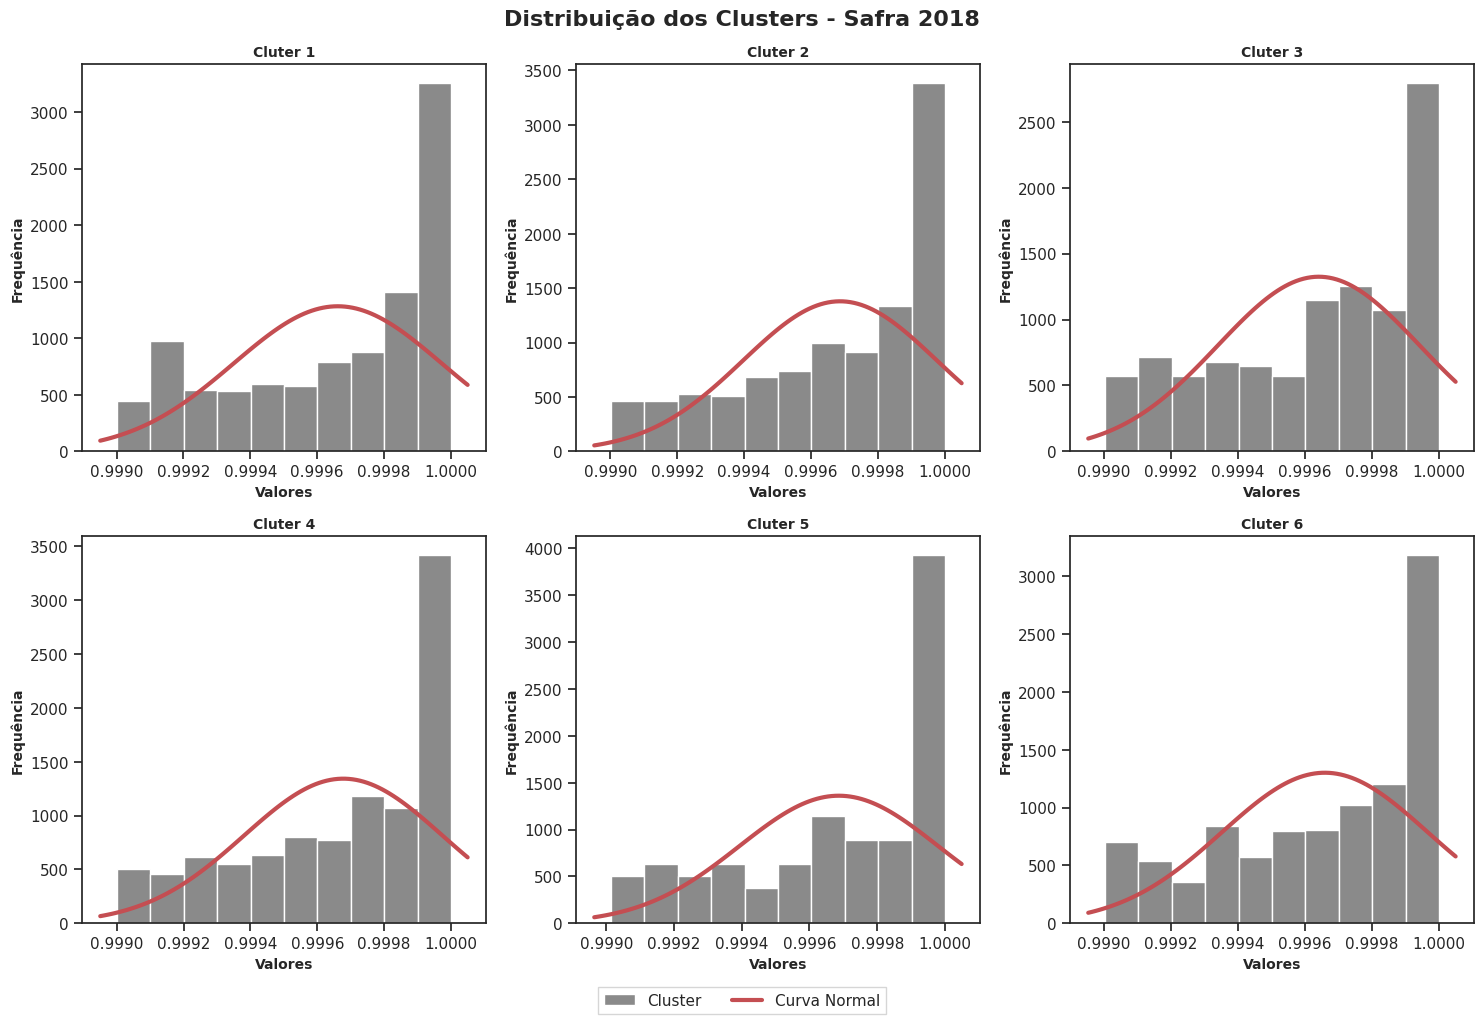

In [ ]:
# Curva Normal Safra18
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/curva_normal_safra18_fuzzy.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Clusters - Safra 2018", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data, color=['#8a8a8a'], label='Cluster', density=True)

  mu, std = np.mean(data), np.std(data)
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(num_linhas * num_colunas):
    label = 'safra18_c' + str(i + 1)
    safra = 'Cluter ' + str(i + 1)
    hist_grad(results_fuzzy[label], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

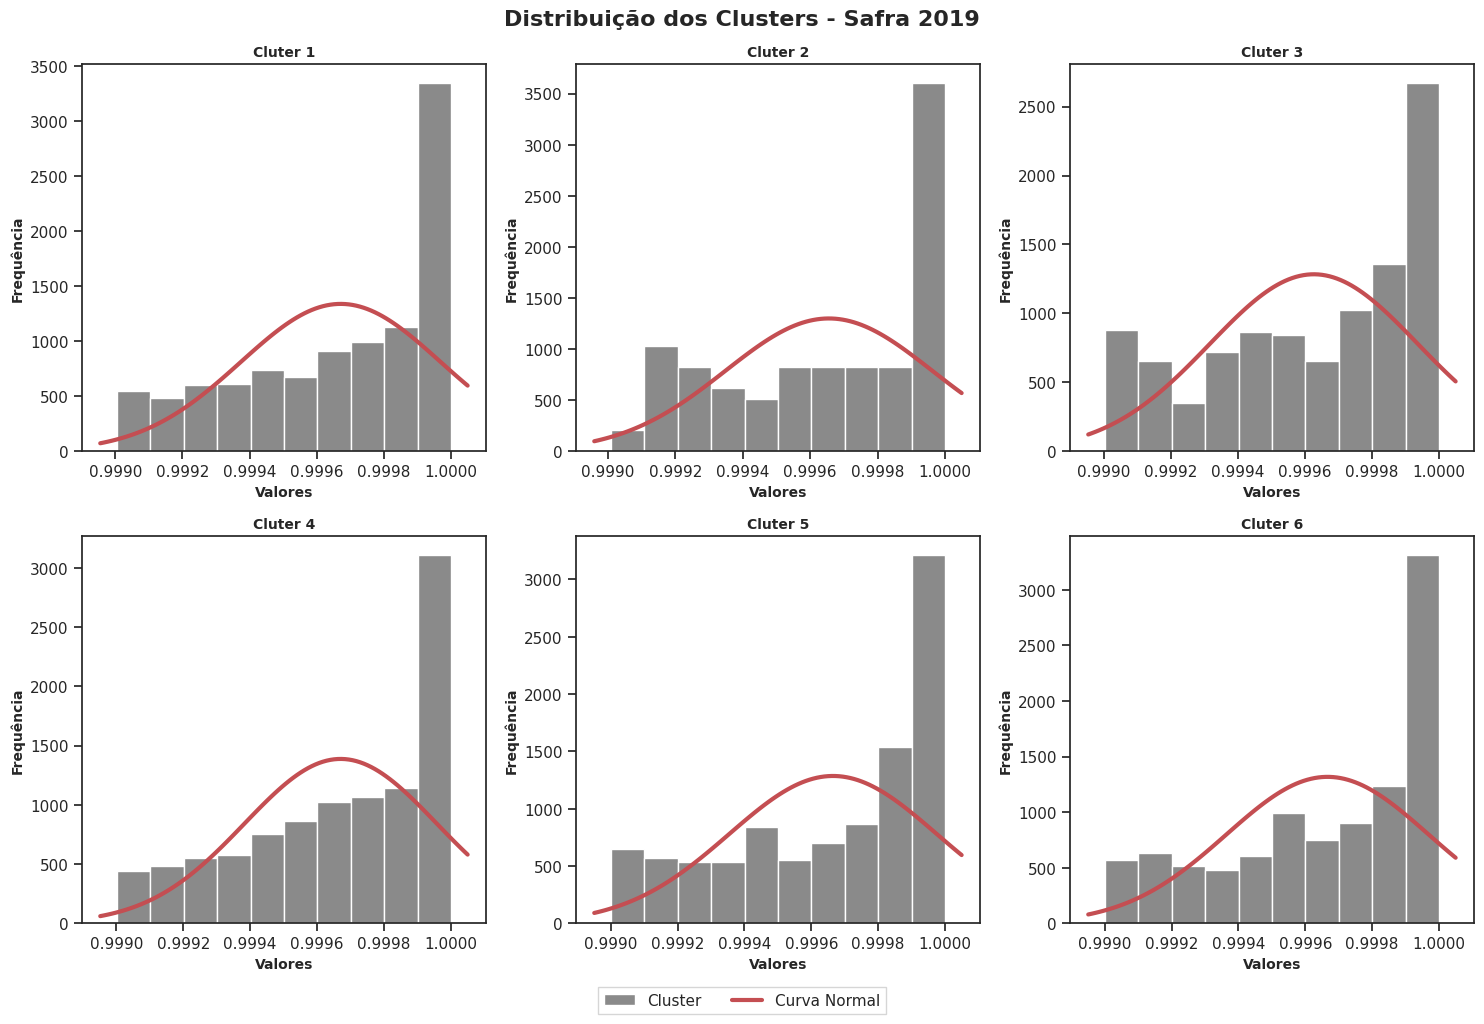

In [ ]:
# Curva Normal Safra19
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/curva_normal_safra19_fuzzy.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Clusters - Safra 2019", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data, color=['#8a8a8a'], label='Cluster', density=True)

  mu, std = np.mean(data), np.std(data)
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(num_linhas * num_colunas):
    label = 'safra19_c' + str(i + 1)
    safra = 'Cluter ' + str(i + 1)
    hist_grad(results_fuzzy[label], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

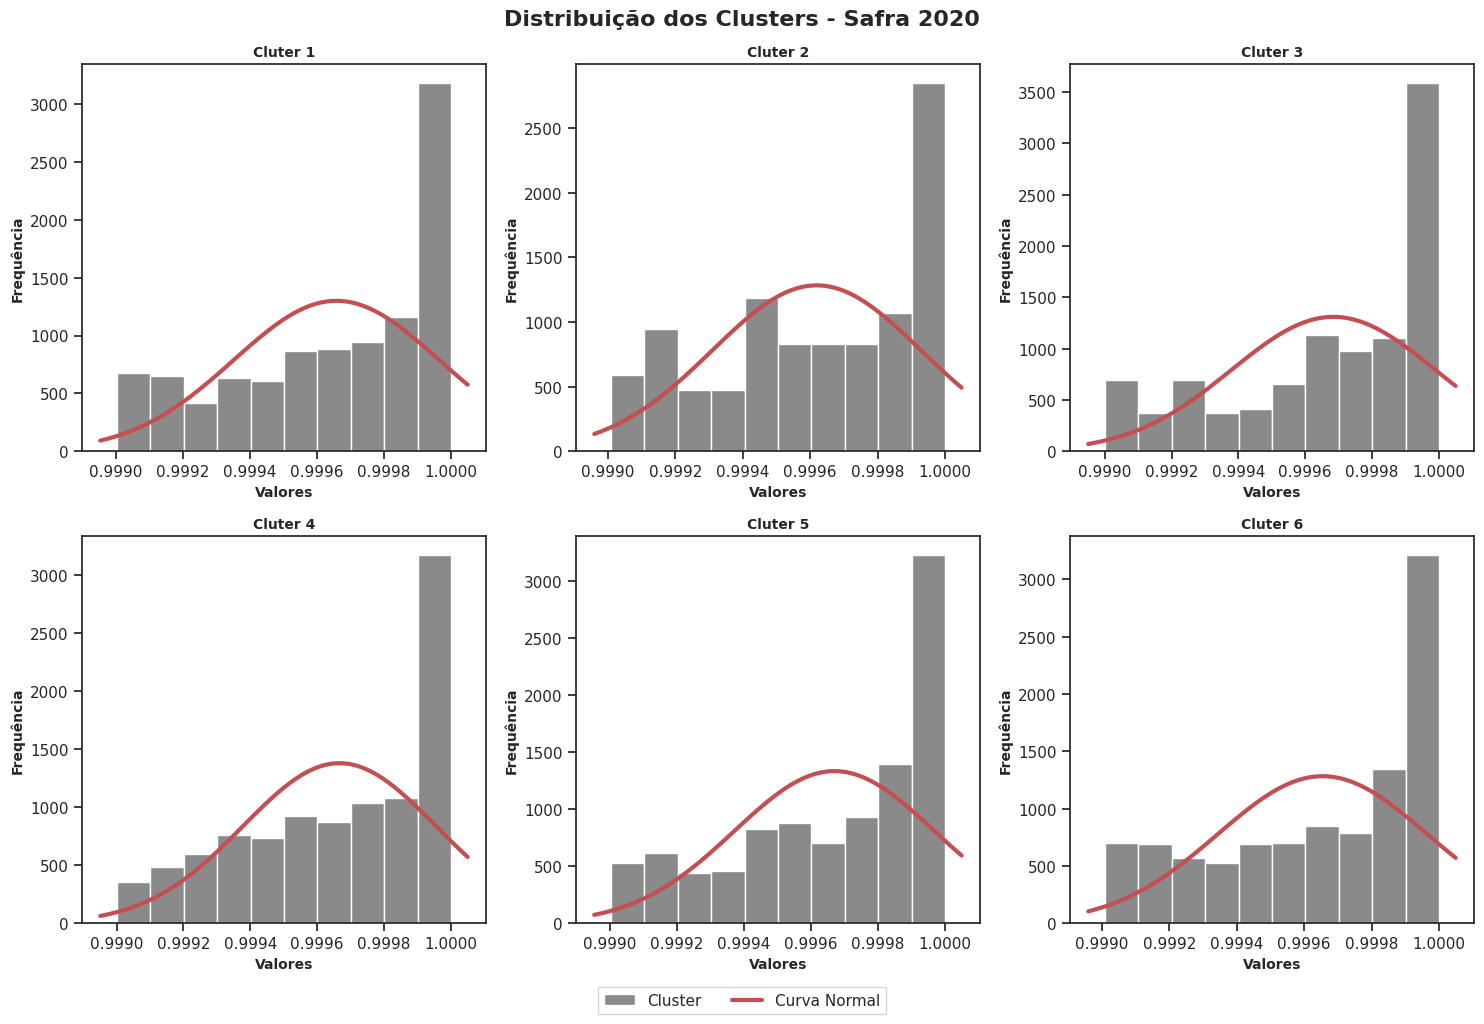

In [ ]:
# Curva Normal Safra20
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/curva_normal_safra20_fuzzy.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Clusters - Safra 2020", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data, color=['#8a8a8a'], label='Cluster', density=True)

  mu, std = np.mean(data), np.std(data)
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(num_linhas * num_colunas):
    label = 'safra20_c' + str(i + 1)
    safra = 'Cluter ' + str(i + 1)
    hist_grad(results_fuzzy[label], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

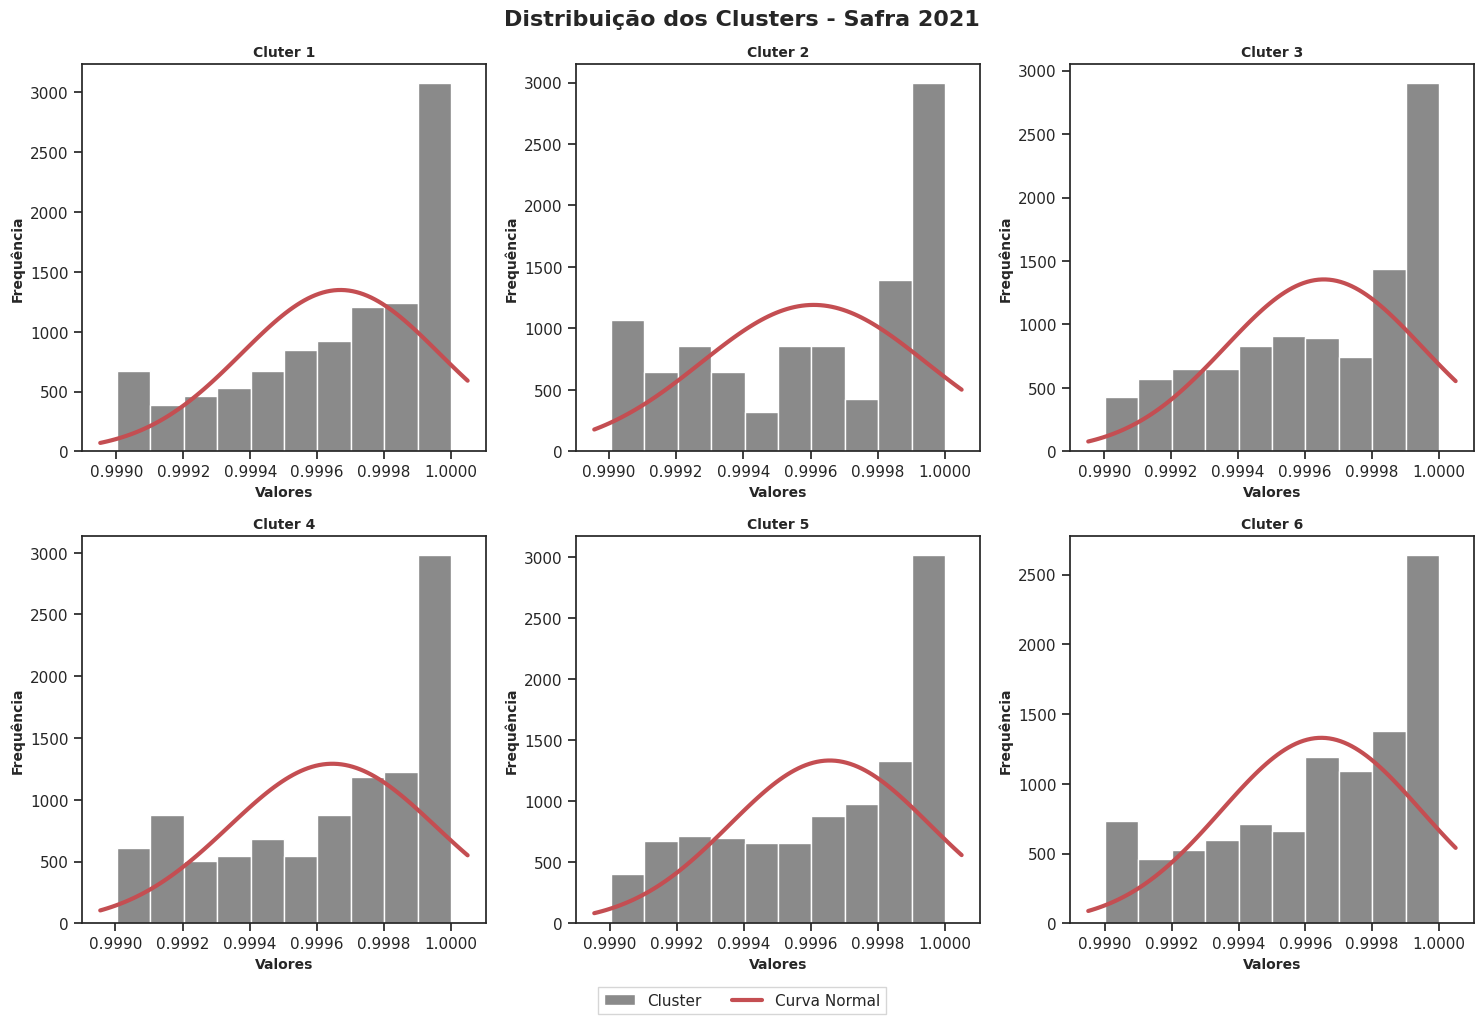

In [ ]:
# Curva Normal Safra21
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/curva_normal_safra21_fuzzy.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Clusters - Safra 2021", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data, color=['#8a8a8a'], label='Cluster', density=True)

  mu, std = np.mean(data), np.std(data)
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(num_linhas * num_colunas):
    label = 'safra21_c' + str(i + 1)
    safra = 'Cluter ' + str(i + 1)
    hist_grad(results_fuzzy[label], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

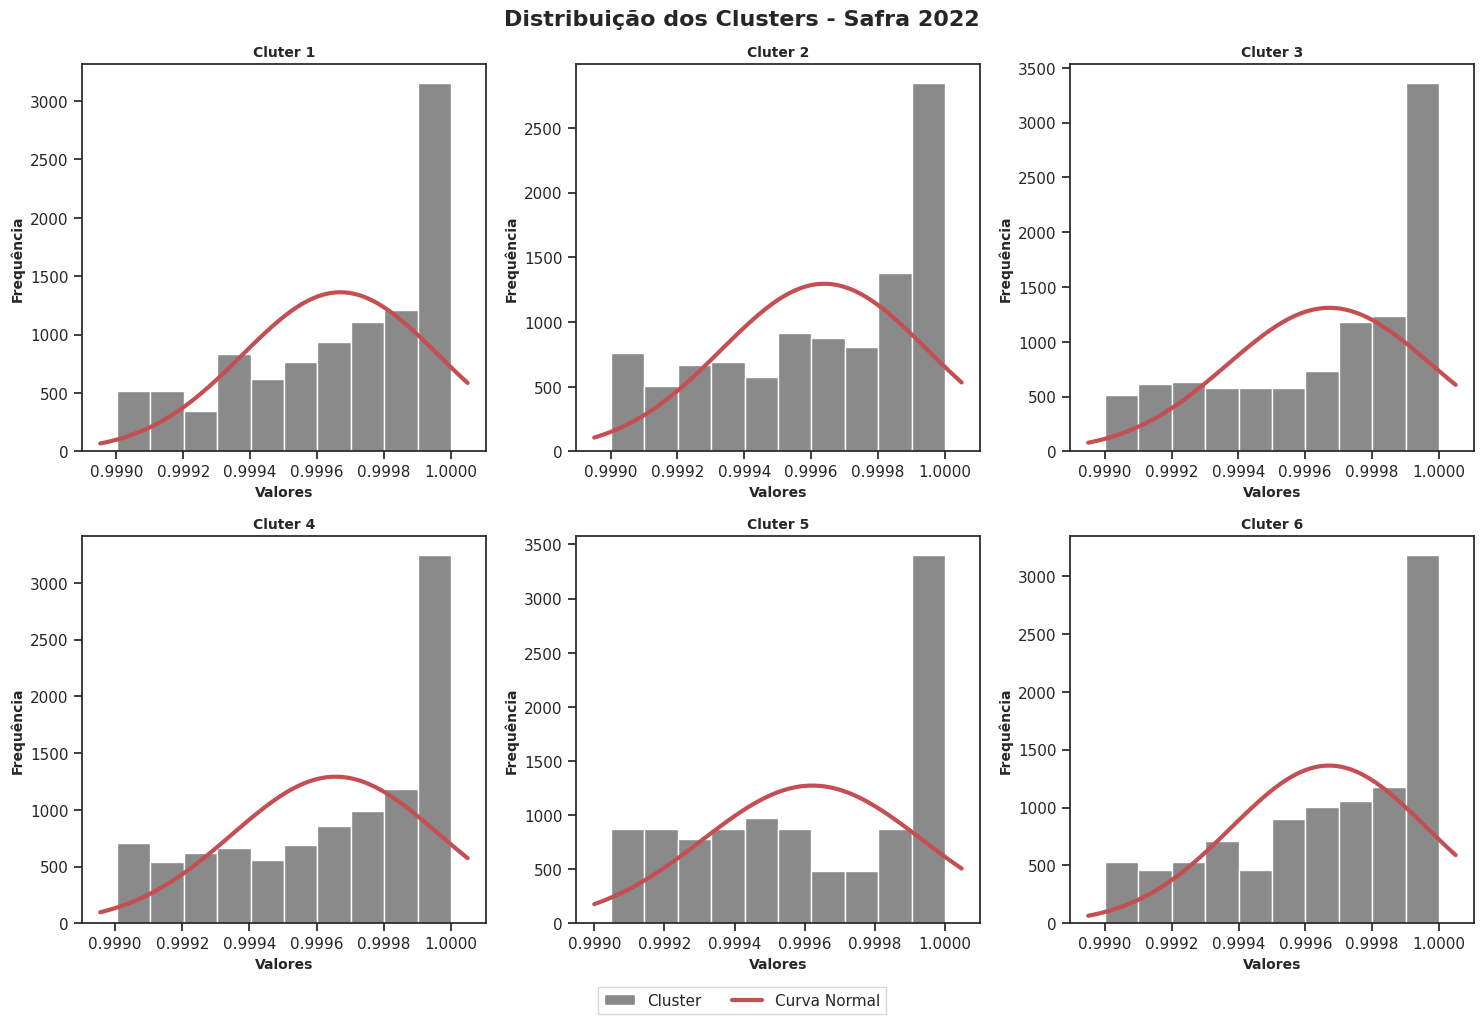

In [ ]:
# Curva Normal Safra22
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/curva_normal_safra22_fuzzy.png'
sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Clusters - Safra 2022", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data, color=['#8a8a8a'], label='Cluster', density=True)

  mu, std = np.mean(data), np.std(data)
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(num_linhas * num_colunas):
    label = 'safra22_c' + str(i + 1)
    safra = 'Cluter ' + str(i + 1)
    hist_grad(results_fuzzy[label], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

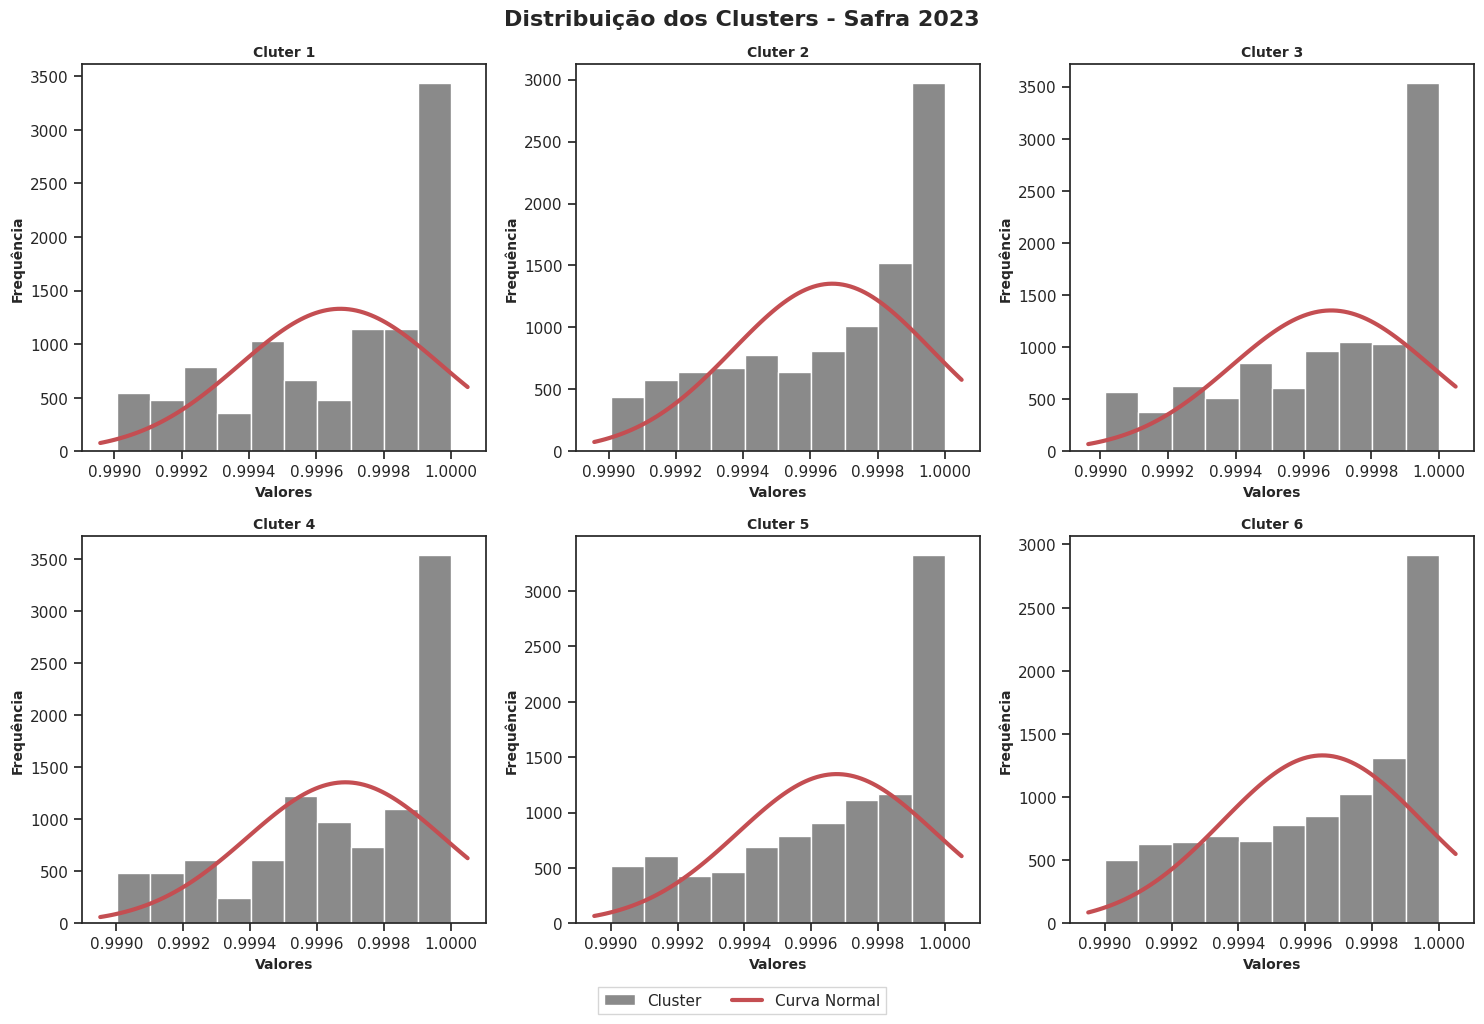

In [ ]:
# Curva Normal Safra23
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/3.Logica_Fuzzy/curva_normal_safra23_fuzzy.png'

sns.set(style="ticks", rc={"axes.grid": False})

num_linhas = 2
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))
fig.suptitle("Distribuição dos Clusters - Safra 2023", fontsize=16, fontweight='bold')

def hist_grad(data, safra, ax):
  ax.hist(data, color=['#8a8a8a'], label='Cluster', density=True)

  mu, std = np.mean(data), np.std(data)
  xmin, xmax = ax.get_xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  ax.plot(x, p, 'r', linewidth=3, label='Curva Normal')

  ax.set_title(safra, fontsize=10, fontweight='bold')
  ax.set_xlabel("Valores", fontsize=10, fontweight='bold')
  ax.set_ylabel("Frequência", fontsize=10, fontweight='bold')


for i in range(num_linhas * num_colunas):
    label = 'safra23_c' + str(i + 1)
    safra = 'Cluter ' + str(i + 1)
    hist_grad(results_fuzzy[label], safra, axs[i // num_colunas, i % num_colunas])

for i in range(6, num_linhas*num_colunas):
    fig.delaxes(axs.flatten()[i])

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.01), fancybox=False, ncol=5)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Erro percentual dos clusters
intervals = [-float('inf'), 5, 15, 25, float('inf')]
categories = ['alta precisão', 'regular', 'média', 'baixa precisão']

erro_percentutal_safra18 = pd.DataFrame({
    'Cluster': df_safra18_estimate['Cluster'],
    '%Erro': df_safra18_estimate['Diferença'] / df_safra18_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_safra18_estimate['Diferença'] / df_safra18_estimate['Area Real'] * 100)
})
erro_percentutal_safra18['Classificação'] = pd.cut(erro_percentutal_safra18['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_safra18)
print('\n')

erro_percentutal_safra19 = pd.DataFrame({
    'Cluster': df_safra19_estimate['Cluster'],
    '%Erro': df_safra19_estimate['Diferença'] / df_safra19_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_safra19_estimate['Diferença'] / df_safra19_estimate['Area Real'] * 100)
})
erro_percentutal_safra19['Classificação'] = pd.cut(erro_percentutal_safra19['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_safra19)
print('\n')

erro_percentutal_safra20 = pd.DataFrame({
    'Cluster': df_safra20_estimate['Cluster'],
    '%Erro': df_safra20_estimate['Diferença'] / df_safra20_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_safra20_estimate['Diferença'] / df_safra20_estimate['Area Real'] * 100)
})
erro_percentutal_safra20['Classificação'] = pd.cut(erro_percentutal_safra20['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_safra20)
print('\n')

erro_percentutal_safra21 = pd.DataFrame({
    'Cluster': df_safra21_estimate['Cluster'],
    '%Erro': df_safra21_estimate['Diferença'] / df_safra21_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_safra21_estimate['Diferença'] / df_safra21_estimate['Area Real'] * 100)
})
erro_percentutal_safra21['Classificação'] = pd.cut(erro_percentutal_safra21['Erro Absoluto'], bins=intervals, labels=categories)
print(erro_percentutal_safra21)
print('\n')

erro_percentutal_safra22 = pd.DataFrame({
    'Cluster': df_safra22_estimate['Cluster'],
    '%Erro': df_safra22_estimate['Diferença'] / df_safra22_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_safra22_estimate['Diferença'] / df_safra22_estimate['Area Real'] * 100)
})
erro_percentutal_safra22['Classificação'] = pd.cut(erro_percentutal_safra22['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_safra22)
print('\n')

erro_percentutal_safra23 = pd.DataFrame({
    'Cluster': df_safra23_estimate['Cluster'],
    '%Erro': df_safra23_estimate['Diferença'] / df_safra23_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_safra23_estimate['Diferença'] / df_safra23_estimate['Area Real'] * 100)
})
erro_percentutal_safra23['Classificação'] = pd.cut(erro_percentutal_safra23['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_safra23)
print('\n')

  Cluster       %Erro  Erro Absoluto   Classificação
0      c1   66.468881      66.468881  baixa precisão
1      c2  113.954859     113.954859  baixa precisão
2      c3  -25.302726      25.302726  baixa precisão
3      c4   17.115149      17.115149           média
4      c5  -78.658030      78.658030  baixa precisão
5      c6   78.206776      78.206776  baixa precisão


  Cluster      %Erro  Erro Absoluto   Classificação
0      c1  61.783731      61.783731  baixa precisão
1      c2 -79.436141      79.436141  baixa precisão
2      c3   2.400147       2.400147   alta precisão
3      c4  33.875551      33.875551  baixa precisão
4      c5  25.481873      25.481873  baixa precisão
5      c6 -30.334487      30.334487  baixa precisão


  Cluster      %Erro  Erro Absoluto   Classificação
0      c1 -15.511232      15.511232           média
1      c2 -84.912720      84.912720  baixa precisão
2      c3 -43.555971      43.555971  baixa precisão
3      c4  28.685445      28.685445  baixa precisão
4

In [ ]:
# Erro medio e absoluto
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_percentual_absoluto.xlsx'

with pd.ExcelWriter(path) as writer:
    erro_percentutal_safra18.to_excel(writer, sheet_name='Safra18', index=False)
    erro_percentutal_safra19.to_excel(writer, sheet_name='Safra19', index=False)
    erro_percentutal_safra20.to_excel(writer, sheet_name='Safra20', index=False)
    erro_percentutal_safra21.to_excel(writer, sheet_name='Safra21', index=False)
    erro_percentutal_safra22.to_excel(writer, sheet_name='Safra22', index=False)
    erro_percentutal_safra23.to_excel(writer, sheet_name='Safra23', index=False)

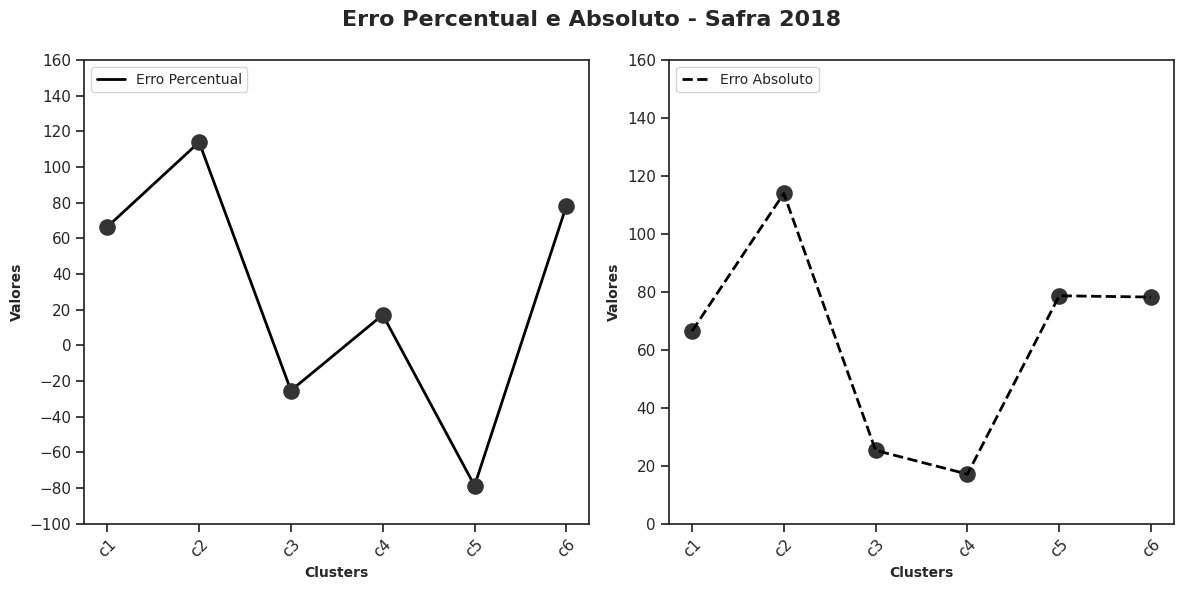

In [ ]:
# Gráfico Linha - Safra18
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_teste_safra2018.png'

df = erro_percentutal_safra18

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Safra 2018", fontsize=16, fontweight='bold')

axs[0].plot(df['Cluster'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Cluster'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-100, 160)
axs[0].set_yticks(range(-100, 161, 20))

axs[1].plot(df['Cluster'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Cluster'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(0, 160)
axs[1].set_yticks(range(0, 161, 20))

for ax in axs:
    ax.set_xlabel('Clusters', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

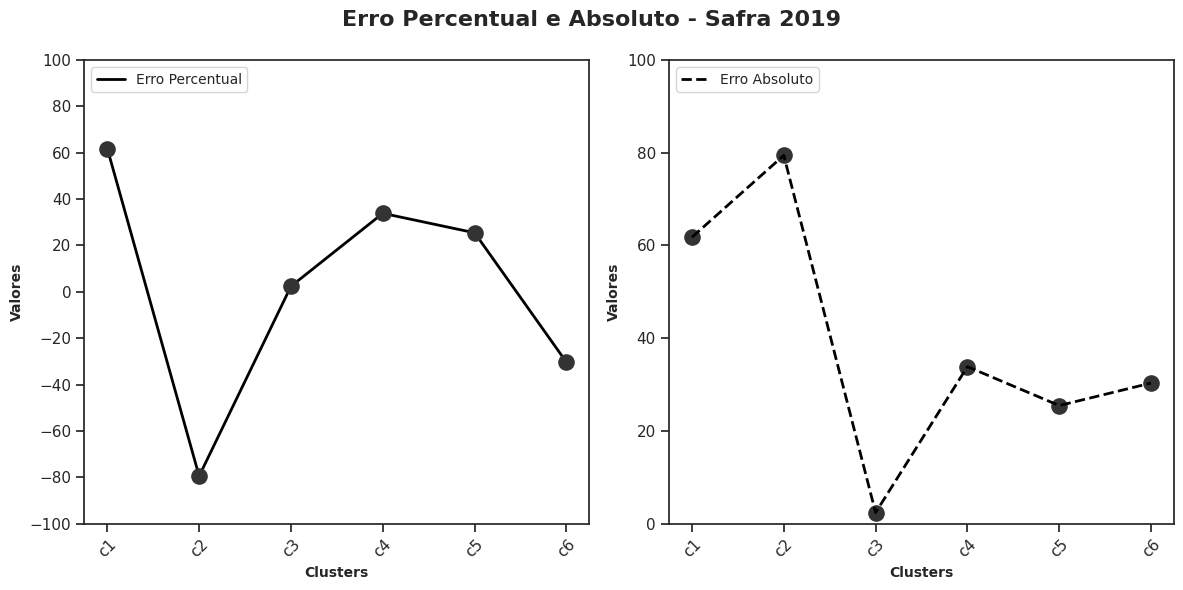

In [ ]:
# Gráfico Linha - Safra19
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_teste_safra2019.png'

df = erro_percentutal_safra19

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Safra 2019", fontsize=16, fontweight='bold')

axs[0].plot(df['Cluster'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Cluster'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-100, 100)
axs[0].set_yticks(range(-100, 101, 20))

axs[1].plot(df['Cluster'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Cluster'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(0, 100)
axs[1].set_yticks(range(0, 101, 20))

for ax in axs:
    ax.set_xlabel('Clusters', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

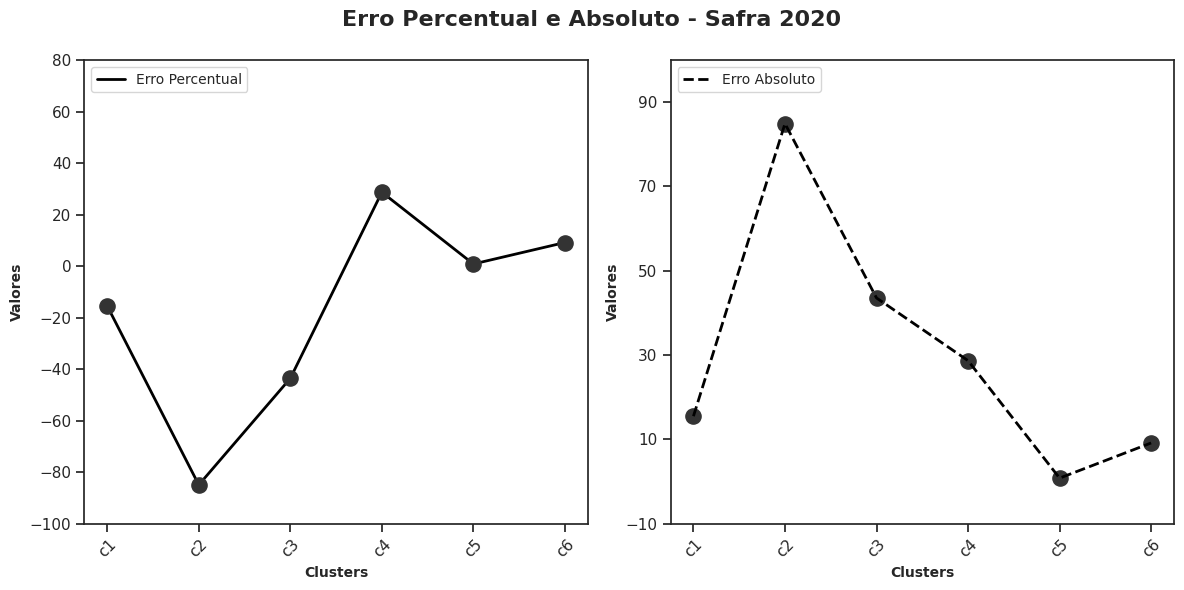

In [ ]:
# Gráfico Linha - Safra20
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_teste_safra2020.png'

df = erro_percentutal_safra20

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Safra 2020", fontsize=16, fontweight='bold')

axs[0].plot(df['Cluster'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Cluster'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-100, 80)
axs[0].set_yticks(range(-100, 81, 20))

axs[1].plot(df['Cluster'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Cluster'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(-10, 100)
axs[1].set_yticks(range(-10, 101, 20))

for ax in axs:
    ax.set_xlabel('Clusters', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

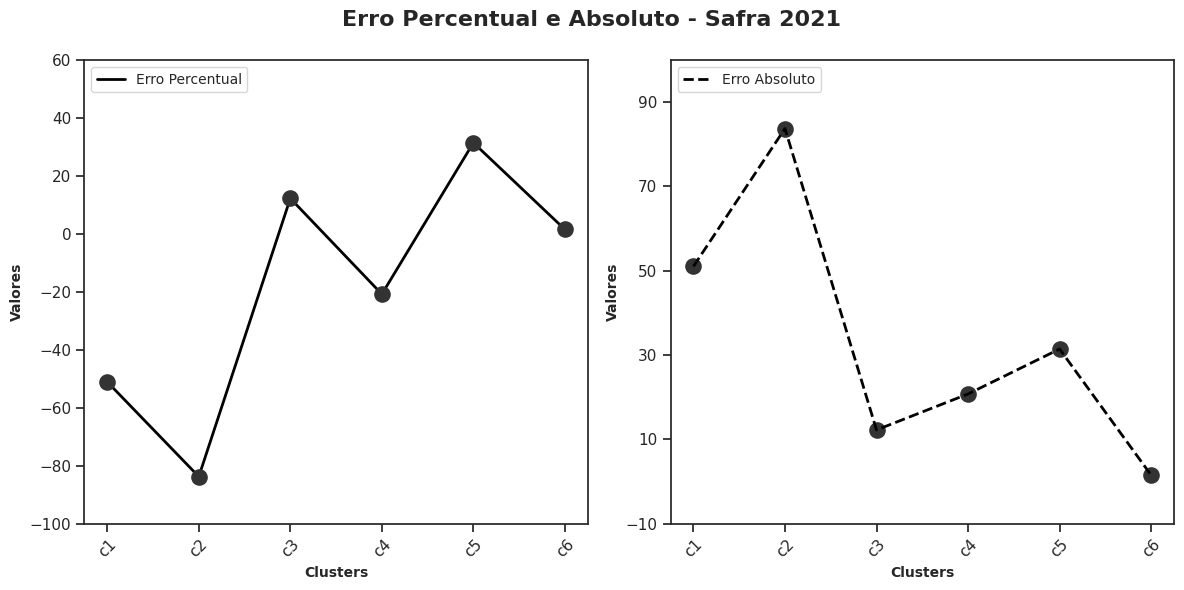

In [ ]:
# Gráfico Linha - Safra21
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_teste_safra2021.png'

df = erro_percentutal_safra21

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Safra 2021", fontsize=16, fontweight='bold')

axs[0].plot(df['Cluster'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Cluster'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-100, 60)
axs[0].set_yticks(range(-100, 61, 20))

axs[1].plot(df['Cluster'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Cluster'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(-10, 100)
axs[1].set_yticks(range(-10, 101, 20))

for ax in axs:
    ax.set_xlabel('Clusters', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

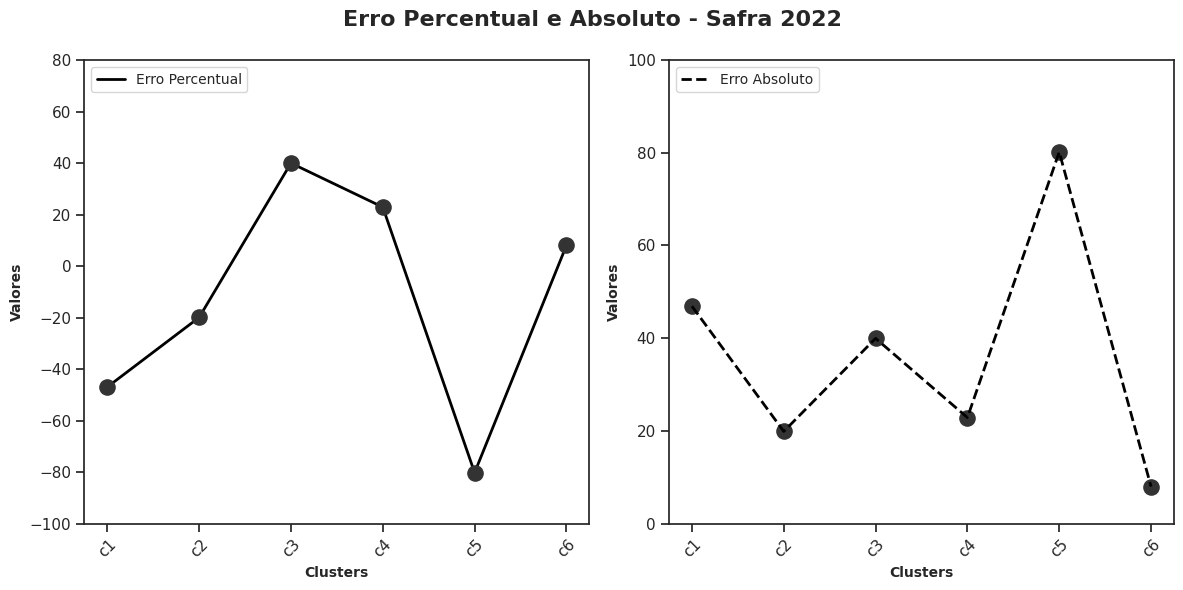

In [ ]:
# Gráfico Linha - Safra22
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_teste_safra2022.png'

df = erro_percentutal_safra22

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Safra 2022", fontsize=16, fontweight='bold')

axs[0].plot(df['Cluster'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Cluster'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-100, 80)
axs[0].set_yticks(range(-100, 81, 20))

axs[1].plot(df['Cluster'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Cluster'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(0, 100)
axs[1].set_yticks(range(0, 101, 20))

for ax in axs:
    ax.set_xlabel('Clusters', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

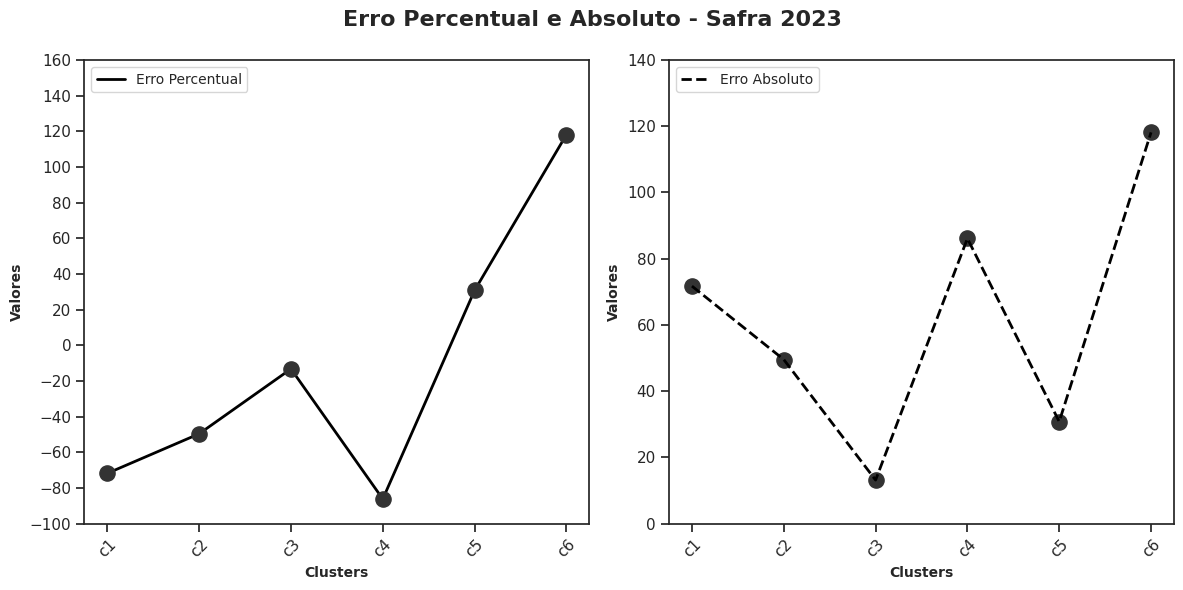

In [ ]:
# Gráfico Linha - Safra23
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/erro_teste_safra2023.png'

df = erro_percentutal_safra23

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Safra 2023", fontsize=16, fontweight='bold')

axs[0].plot(df['Cluster'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Cluster'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-100, 160)
axs[0].set_yticks(range(-100, 161, 20))

axs[1].plot(df['Cluster'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Cluster'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(0, 140)
axs[1].set_yticks(range(0, 141, 20))

for ax in axs:
    ax.set_xlabel('Clusters', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Teste de Normalidade das Variâncias
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/dn_previ_safras.xlsx'

shapiro_stats18, shapiro_pvalor18 = stats.shapiro(erro_percentutal_safra18['%Erro'])
levene_stats_safra18, leveve_pValor_safra18 = stats.levene(erro_percentutal_safra18['%Erro'], df_safra18_estimate['Area Real'])

df_dn_safra18 = pd.DataFrame({
    'safra': 'Safra18',
    'shapiro_test': [shapiro_stats18],
    'shapiro_pValor': [shapiro_pvalor18],
    'levene_test': [levene_stats_safra18],
    'leveve_pValor': [leveve_pValor_safra18]
})

shapiro_stats19, shapiro_pvalor19 = stats.shapiro(erro_percentutal_safra19['%Erro'])
levene_stats_safra19, leveve_pValor_safra19 = stats.levene(erro_percentutal_safra19['%Erro'], df_safra19_estimate['Area Real'])

df_dn_safra19 = pd.DataFrame({
    'safra': 'Safra19',
    'shapiro_test': [shapiro_stats19],
    'shapiro_pValor': [shapiro_pvalor19],
    'levene_test': [levene_stats_safra19],
    'leveve_pValor': [leveve_pValor_safra19]
})

shapiro_stats20, shapiro_pvalor20 = stats.shapiro(erro_percentutal_safra20['%Erro'])
levene_stats_safra20, leveve_pValor_safra20 = stats.levene(erro_percentutal_safra20['%Erro'], df_safra20_estimate['Area Real'])

df_dn_safra20 = pd.DataFrame({
    'safra': 'Safra20',
    'shapiro_test': [shapiro_stats20],
    'shapiro_pValor': [shapiro_pvalor20],
    'levene_test': [levene_stats_safra20],
    'leveve_pValor': [leveve_pValor_safra20]
})

shapiro_stats21, shapiro_pvalor21 = stats.shapiro(erro_percentutal_safra21['%Erro'])
levene_stats_safra21, leveve_pValor_safra21 = stats.levene(erro_percentutal_safra21['%Erro'], df_safra21_estimate['Area Real'])

df_dn_safra21 = pd.DataFrame({
    'safra': 'Safra21',
    'shapiro_test': [shapiro_stats21],
    'shapiro_pValor': [shapiro_pvalor21],
    'levene_test': [levene_stats_safra21],
    'leveve_pValor': [leveve_pValor_safra21]
})

shapiro_stats22, shapiro_pvalor22 = stats.shapiro(erro_percentutal_safra22['%Erro'])
levene_stats_safra22, leveve_pValor_safra22 = stats.levene(erro_percentutal_safra22['%Erro'], df_safra22_estimate['Area Real'])

df_dn_safra22 = pd.DataFrame({
    'safra': 'Safra22',
    'shapiro_test': [shapiro_stats22],
    'shapiro_pValor': [shapiro_pvalor22],
    'levene_test': [levene_stats_safra22],
    'leveve_pValor': [leveve_pValor_safra22]
})

shapiro_stats23, shapiro_pvalor23 = stats.shapiro(erro_percentutal_safra23['%Erro'])
levene_stats_safra23, leveve_pValor_safra23 = stats.levene(erro_percentutal_safra23['%Erro'], df_safra23_estimate['Area Real'])

df_dn_safra23 = pd.DataFrame({
    'safra': 'Safra23',
    'shapiro_test': [shapiro_stats23],
    'shapiro_pValor': [shapiro_pvalor23],
    'levene_test': [levene_stats_safra23],
    'leveve_pValor': [leveve_pValor_safra23]
})

df_dn_safra = pd.concat([df_dn_safra18, df_dn_safra19], ignore_index=True)
df_dn_safra = pd.concat([df_dn_safra, df_dn_safra20], ignore_index=True)
df_dn_safra = pd.concat([df_dn_safra, df_dn_safra21], ignore_index=True)
df_dn_safra = pd.concat([df_dn_safra, df_dn_safra22], ignore_index=True)
df_dn_safra = pd.concat([df_dn_safra, df_dn_safra23], ignore_index=True)

print(df_dn_safra )

df_dn_safra.to_excel(path, sheet_name='norm_homo', index=False)

     safra  shapiro_test  shapiro_pValor  levene_test  leveve_pValor
0  Safra18      0.961418        0.830603    14.479691       0.003456
1  Safra19      0.958795        0.810408     8.827611       0.014019
2  Safra20      0.948148        0.725260     8.006776       0.017863
3  Safra21      0.960295        0.822012    11.574214       0.006747
4  Safra22      0.962634        0.839797    15.180742       0.002979
5  Safra23      0.912220        0.451163     8.262294       0.016543


In [ ]:
# Teste T
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/4.Previsoes/teste_t_cluster.xlsx'

t_statistic_safra18, p_value_safra18 = stats.ttest_1samp(erro_percentutal_safra18['Erro Absoluto'].values.T, 5)
meanT_safra18 = np.mean(erro_percentutal_safra18['Erro Absoluto'])

t_statistic_safra19, p_value_safra19 = stats.ttest_1samp(erro_percentutal_safra19['Erro Absoluto'].values.T, 5)
meanT_safra19 = np.mean(erro_percentutal_safra19['Erro Absoluto'])

t_statistic_safra20, p_value_safra20 = stats.ttest_1samp(erro_percentutal_safra20['Erro Absoluto'].values.T, 5)
meanT_safra20 = np.mean(erro_percentutal_safra20['Erro Absoluto'])

t_statistic_safra21, p_value_safra21 = stats.ttest_1samp(erro_percentutal_safra21['Erro Absoluto'].values.T, 5)
meanT_safra21 = np.mean(erro_percentutal_safra21['Erro Absoluto'])

t_statistic_safra22, p_value_safra22 = stats.ttest_1samp(erro_percentutal_safra22['Erro Absoluto'].values.T, 5)
meanT_safra22 = np.mean(erro_percentutal_safra22['Erro Absoluto'])

t_statistic_safra23, p_value_safra23 = stats.ttest_1samp(erro_percentutal_safra23['Erro Absoluto'].values.T, 5)
meanT_safra23 = np.mean(erro_percentutal_safra23['Erro Absoluto'])

df_testeT_cluster = pd.DataFrame({
    't_statistic': [
        t_statistic_safra18,
        t_statistic_safra19,
        t_statistic_safra20,
        t_statistic_safra21,
        t_statistic_safra22,
        t_statistic_safra23
    ],
    'p-valor': [
        p_value_safra18,
        p_value_safra19,
        p_value_safra20,
        p_value_safra21,
        p_value_safra22,
        p_value_safra23
    ]
})

print(df_testeT_cluster)

df_testeT_cluster.to_excel(path, sheet_name='Teste T', index=False)


   t_statistic   p-valor
0     3.926302  0.011111
1     3.019647  0.029428
2     2.033516  0.097672
3     2.331650  0.067073
4     2.985833  0.030594
5     3.618718  0.015240


In [ ]:
# Calcular a área plantada - NVDI
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/5.Previsoes_NVDI/area_estimada_nvdi.xlsx'

list_area_estimada = []
list_safra = []
list_area_real = [132298, 168198, 198843, 204059, 192138, 208549]

for i, nvdi in enumerate(list_data_safra):
  safra ='Safra' + str(18 + i)
  areaMunicipio = 13614.552 * 100
  pontoAlgodao = contagem_pixel[safra][4]
  pontoAmostral = contagem_pixel[safra][5]

  area_algodao = round(((pontoAlgodao / pontoAmostral) * areaMunicipio), 2)

  list_area_estimada.append(area_algodao)
  list_safra.append(safra)

df_nvdi_estimate = pd.DataFrame({
    'Safra': list_safra,
    'Area Estimada': list_area_estimada,
    'Area Real': list_area_real
})

df_nvdi_estimate['Diferenca'] = df_nvdi_estimate['Area Estimada'] - df_nvdi_estimate['Area Real']

print(df_nvdi_estimate)

df_nvdi_estimate.to_excel(path, sheet_name='NVDI', index=False)


     Safra  Area Estimada  Area Real  Diferenca
0  Safra18      271901.44     132298  139603.44
1  Safra19      272209.68     168198  104011.68
2  Safra20      272164.48     198843   73321.48
3  Safra21      272090.51     204059   68031.51
4  Safra22      271893.24     192138   79755.24
5  Safra23      271814.28     208549   63265.28


In [ ]:
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/5.Previsoes_NVDI/erro_nvdi.xlsx'

# Erro percentual dos clusters
intervals = [-float('inf'), 5, 15, 25, float('inf')]
categories = ['alta precisão', 'regular', 'média', 'baixa precisão']

erro_percentutal_nvdi = pd.DataFrame({
    'Safra': df_nvdi_estimate['Safra'],
    '%Erro': df_nvdi_estimate['Diferenca'] / df_nvdi_estimate['Area Real'] * 100,
    'Erro Absoluto': abs(df_nvdi_estimate['Diferenca'] / df_nvdi_estimate['Area Real'] * 100)
})
erro_percentutal_nvdi['Classificação'] = pd.cut(erro_percentutal_nvdi['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_nvdi)

erro_percentutal_nvdi.to_excel(path, sheet_name='nvdi', index=False)

     Safra       %Erro  Erro Absoluto   Classificação
0  Safra18  105.521958     105.521958  baixa precisão
1  Safra19   61.838833      61.838833  baixa precisão
2  Safra20   36.874056      36.874056  baixa precisão
3  Safra21   33.339137      33.339137  baixa precisão
4  Safra22   41.509353      41.509353  baixa precisão
5  Safra23   30.335931      30.335931  baixa precisão


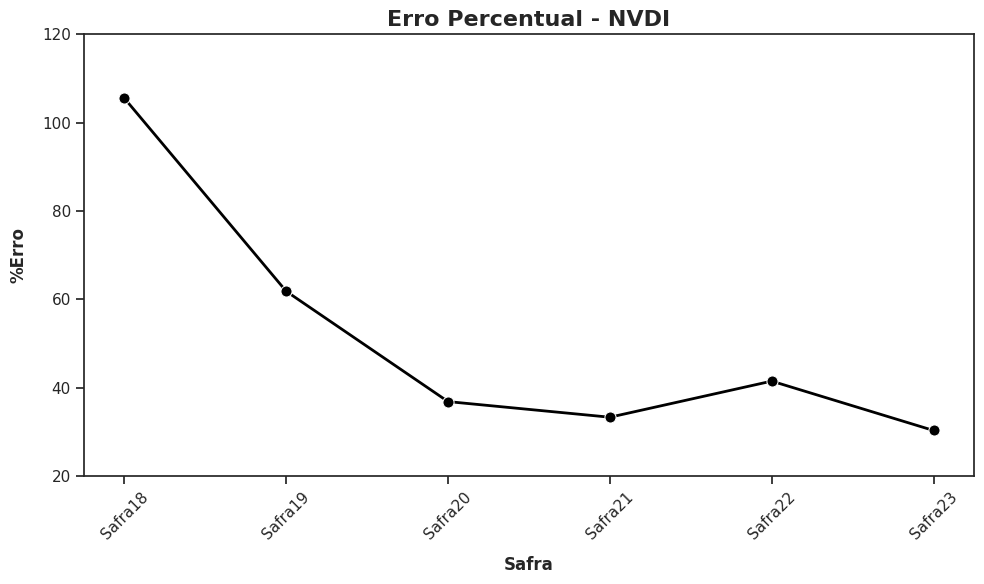

In [ ]:
# Gráfico Linha - NVDI
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/5.Previsoes_NVDI/erro_teste_nvdi.png'

df = erro_percentutal_nvdi

sns.set(style="ticks", rc={"axes.grid": False})

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Safra', y='%Erro', marker='o', color='black', linewidth=2, markersize=8)

plt.xlabel('Safra', fontsize=12, fontweight='bold', labelpad=10)
plt.xticks(rotation=45)

plt.ylabel('%Erro', fontsize=12, fontweight='bold', labelpad=10)
plt.ylim(20, 120)


plt.title('Erro Percentual - NVDI', fontsize=16, fontweight='bold')


plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Teste Estatístico
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/5.Previsoes_NVDI/teste_nvdi.xlsx'

shapiro_stats_nvdi, shapiro_pvalor_nvdi = stats.shapiro(erro_percentutal_nvdi['%Erro'])
levene_stats_safra_nvdi, leveve_pValor_nvdi = stats.levene(erro_percentutal_nvdi['%Erro'], df_nvdi_estimate['Area Real'])

wilcoxon_nvdi_statistic, wilcoxon_nvdi_pvalue = wilcoxon(erro_percentutal_nvdi['%Erro'] - 5)

df_teste_nvdi = pd.DataFrame({
    'shapiro_statistic': [
        shapiro_stats_nvdi
    ],
    'shapiro_pvalor': [
        shapiro_pvalor_nvdi
    ],
    'levene_statistic': [
        levene_stats_safra_nvdi
    ],
    'levene_pvalor': [
        leveve_pValor_nvdi
    ],
    'wilcoxon_statistic': [
        wilcoxon_nvdi_statistic
    ],
    'wilcoxon_pvalor': [
        wilcoxon_nvdi_pvalue
    ]
})

print(df_teste_nvdi)

df_teste_nvdi.to_excel(path, sheet_name='Teste T', index=False)


   shapiro_statistic  shapiro_pvalor  levene_statistic  levene_pvalor  \
0           0.782365        0.040549          4.428553       0.061618   

   wilcoxon_statistic  wilcoxon_pvalor  
0                 0.0          0.03125  


In [ ]:
# Produtividade - Melhores clusters
cluster_safra18 = erro_percentutal_safra18[erro_percentutal_safra18['Classificação'] == 'média']
cluster_safra19 = erro_percentutal_safra19[erro_percentutal_safra19['Classificação'] == 'alta precisão']
cluster_safra20 = erro_percentutal_safra20[erro_percentutal_safra20['Classificação'] == 'alta precisão']
cluster_safra21 = erro_percentutal_safra21[erro_percentutal_safra21['Classificação'] == 'alta precisão']
cluster_safra22 = erro_percentutal_safra22[erro_percentutal_safra22['Classificação'] == 'regular']
cluster_safra23 = erro_percentutal_safra23[erro_percentutal_safra23['Classificação'] == 'regular']

cluster_safra18 = cluster_safra18.copy()
cluster_safra19 = cluster_safra19.copy()
cluster_safra20 = cluster_safra20.copy()
cluster_safra21 = cluster_safra21.copy()
cluster_safra22 = cluster_safra22.copy()
cluster_safra23 = cluster_safra23.copy()

cluster_safra18['Safra'] = 'Safra18'
cluster_safra19['Safra'] = 'Safra19'
cluster_safra20['Safra'] = 'Safra20'
cluster_safra21['Safra'] = 'Safra21'
cluster_safra22['Safra'] = 'Safra22'
cluster_safra23['Safra'] = 'Safra23'

df_clusters_produtividade = pd.concat([cluster_safra18,
                            cluster_safra19,
                            cluster_safra20,
                            cluster_safra21,
                            cluster_safra22,
                            cluster_safra23])

df_clusters_produtividade = df_clusters_produtividade[['Safra',
                                                       'Cluster',
                                                       '%Erro',
                                                       'Erro Absoluto',
                                                       'Classificação']]

df_clusters_produtividade.reset_index(drop=True, inplace=True)

print(df_clusters_produtividade)

     Safra Cluster      %Erro  Erro Absoluto  Classificação
0  Safra18      c4  17.115149      17.115149          média
1  Safra19      c3   2.400147       2.400147  alta precisão
2  Safra20      c5   0.818233       0.818233  alta precisão
3  Safra21      c6   1.527499       1.527499  alta precisão
4  Safra22      c6   8.010388       8.010388        regular
5  Safra23      c3 -13.182034      13.182034        regular


In [ ]:
# Produtividade - Área
area_safra18 = df_safra18_estimate[df_safra18_estimate['Cluster'] == 'c4']
area_safra19 = df_safra19_estimate[df_safra19_estimate['Cluster'] == 'c3']
area_safra20 = df_safra20_estimate[df_safra20_estimate['Cluster'] == 'c5']
area_safra21 = df_safra21_estimate[df_safra21_estimate['Cluster'] == 'c6']
area_safra22 = df_safra22_estimate[df_safra22_estimate['Cluster'] == 'c6']
area_safra23 = df_safra23_estimate[df_safra23_estimate['Cluster'] == 'c3']

area_safra18 = area_safra18.copy()
area_safra19 = area_safra19.copy()
area_safra20 = area_safra20.copy()
area_safra21 = area_safra21.copy()
area_safra22 = area_safra22.copy()
area_safra23 = area_safra23.copy()

area_safra18['Safra'] = 'Safra18'
area_safra19['Safra'] = 'Safra19'
area_safra20['Safra'] = 'Safra20'
area_safra21['Safra'] = 'Safra21'
area_safra22['Safra'] = 'Safra22'
area_safra23['Safra'] = 'Safra23'

df_area_produtividade = pd.concat([area_safra18,
                            area_safra19,
                            area_safra20,
                            area_safra21,
                            area_safra22,
                            area_safra23])

df_area_produtividade = df_area_produtividade[['Safra', 'Cluster', 'Area Estimada', 'Area Real']]
df_area_produtividade = df_area_produtividade.reset_index(drop=True)

print(df_area_produtividade)

     Safra Cluster  Area Estimada  Area Real
0  Safra18      c4         154941     132298
1  Safra19      c3         172235     168198
2  Safra20      c5         200470     198843
3  Safra21      c6         207176     204059
4  Safra22      c6         207529     192138
5  Safra23      c3         181058     208549


In [ ]:
# Produtividade
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/6.Previsoes_Produtividade/prev_produtividade.xlsx'
list_rendimento_ha = [4500, 4500, 4500, 4853, 4738, 3321]
list_produtividade_real = [595341, 756891, 894794, 990232, 910280, 692695]

list_produtividade_estimada = []

for index, row in df_area_produtividade.iterrows():
  area_estimada = row['Area Estimada']
  rendimento_ha = list_rendimento_ha[index]

  produtividade_estimada = int((area_estimada * rendimento_ha) / 1000)
  list_produtividade_estimada.append(produtividade_estimada)

df_area_produtividade['Produtividade Real'] = list_produtividade_real
df_area_produtividade['Produtividade Estimada'] = list_produtividade_estimada
df_area_produtividade['Diferenca'] = df_area_produtividade['Produtividade Estimada'] - df_area_produtividade['Produtividade Real']

print(df_area_produtividade)

df_area_produtividade.to_excel(path, sheet_name='Produtividade', index=False)


     Safra Cluster  Area Estimada  Area Real  Produtividade Real  \
0  Safra18      c4         154941     132298              595341   
1  Safra19      c3         172235     168198              756891   
2  Safra20      c5         200470     198843              894794   
3  Safra21      c6         207176     204059              990232   
4  Safra22      c6         207529     192138              910280   
5  Safra23      c3         181058     208549              692695   

   Produtividade Estimada  Diferenca  
0                  697234     101893  
1                  775057      18166  
2                  902115       7321  
3                 1005425      15193  
4                  983272      72992  
5                  601293     -91402  


In [ ]:
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/6.Previsoes_Produtividade/erro_produtividade.xlsx'

# Erro percentual dos clusters
intervals = [-float('inf'), 5, 15, 25, float('inf')]
categories = ['alta precisão', 'regular', 'média', 'baixa precisão']

erro_percentutal_produtividade = pd.DataFrame({
    'Safra': df_area_produtividade['Safra'],
    '%Erro': df_area_produtividade['Diferenca'] / df_area_produtividade['Produtividade Real'] * 100,
    'Erro Absoluto': abs(df_area_produtividade['Diferenca'] / df_area_produtividade['Produtividade Real'] * 100)
})
erro_percentutal_produtividade['Classificação'] = pd.cut(erro_percentutal_produtividade['Erro Absoluto'], bins=intervals, labels=categories)

print(erro_percentutal_produtividade)

erro_percentutal_produtividade.to_excel(path, sheet_name='nvdi', index=False)

     Safra      %Erro  Erro Absoluto  Classificação
0  Safra18  17.115065      17.115065          média
1  Safra19   2.400081       2.400081  alta precisão
2  Safra20   0.818177       0.818177  alta precisão
3  Safra21   1.534287       1.534287  alta precisão
4  Safra22   8.018632       8.018632        regular
5  Safra23 -13.195129      13.195129        regular


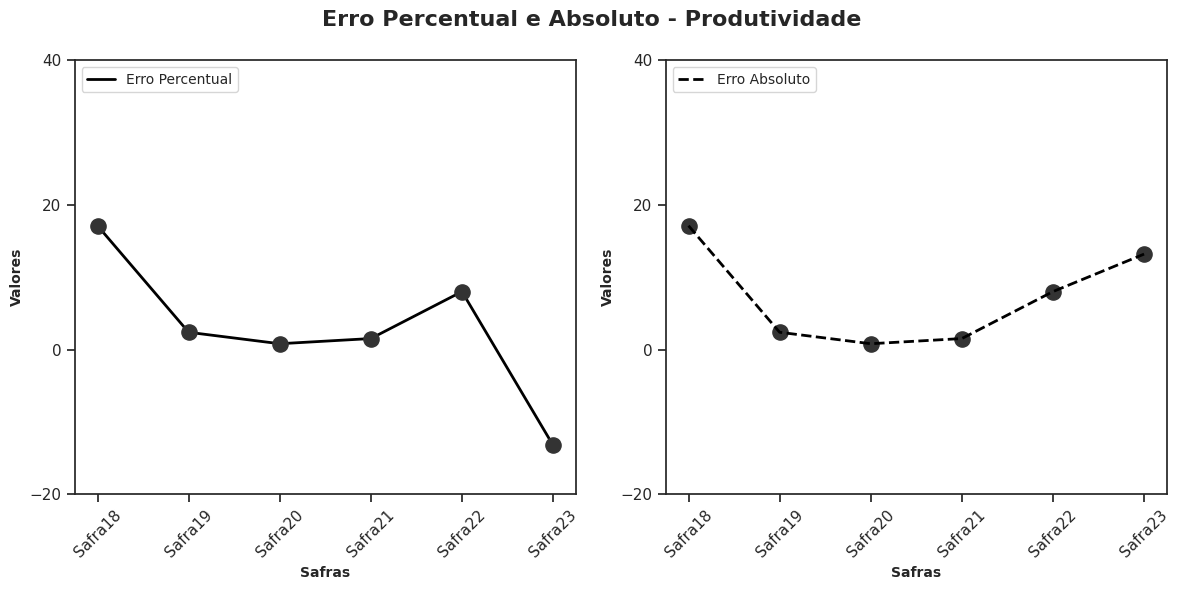

In [ ]:
# Gráfico Linha - Produtividade
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/6.Previsoes_Produtividade/erro_teste_produtividade.png'

df = erro_percentutal_produtividade

sns.set(style="ticks", rc={"axes.grid": False})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("Erro Percentual e Absoluto - Produtividade", fontsize=16, fontweight='bold')

axs[0].plot(df['Safra'], df['%Erro'], color='black', linestyle='-', linewidth=2, label='Erro Percentual', zorder=2)
axs[0].scatter(df['Safra'], df['%Erro'], color='#333', s=120, zorder=2)

axs[0].set_ylim(-20, 40)
axs[0].set_yticks(range(-20, 41, 20))

axs[1].plot(df['Safra'], df['Erro Absoluto'], color='black', linestyle='--', linewidth=2, label='Erro Absoluto')
axs[1].scatter(df['Safra'], df['Erro Absoluto'], color='#333', s=120, zorder=1)

axs[1].set_ylim(-20, 40)
axs[1].set_yticks(range(-20, 41, 20))

for ax in axs:
    ax.set_xlabel('Safras', fontsize=10, fontweight='bold')
    ax.set_ylabel('Valores', fontsize=10, fontweight='bold')
    ax.legend(handles=ax.lines, loc='upper left', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(path, bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Teste Estatístico
path = '/content/drive/MyDrive/LOGICA_FUZZZY/Fuzzy/6.Previsoes_Produtividade/teste_produtividade.xlsx'

shapiro_stats_produt, shapiro_pvalor_produt = stats.shapiro(erro_percentutal_produtividade['%Erro'])
levene_stats_safra_produt, leveve_pValor_produt = stats.levene(erro_percentutal_produtividade['%Erro'], df_area_produtividade['Produtividade Real'])

t_statistic_safra_produt, t_pvalue_produt = stats.ttest_1samp(erro_percentutal_produtividade['Erro Absoluto'].values.T, 5)

df_teste_produt = pd.DataFrame({
    'shapiro_statistic': [
        shapiro_stats_produt
    ],
    'shapiro_pvalor': [
        shapiro_pvalor_produt
    ],
    'levene_statistic': [
        levene_stats_safra_produt
    ],
    'levene_pvalor': [
        leveve_pValor_produt
    ],
    't_statistic': [
        t_statistic_safra_produt
    ],
    't_pvalor': [
        t_pvalue_produt
    ]
})

print(df_teste_produt)

df_teste_produt.to_excel(path, sheet_name='Teste T', index=False)

   shapiro_statistic  shapiro_pvalor  levene_statistic  levene_pvalor  \
0           0.943849        0.690343         22.691106       0.000764   

   t_statistic  t_pvalor  
0     0.786066  0.467429  
